# Introduction
**Created by: David Braun, Matthew Henning, Soad Ahmed, Mengyuan Cui (Tracy), Cristian Zendejas**

In this project, we aim to analyze the current US real estate market to identify the best investment opportunities for a $12 million investment in single-family homes or rental apartments. Our focus is on evaluating market trends, sale prices, inventory listings, and rental yields to determine the optimal timing and locations for investment. We will use data from Zillow and a few other sources to support our analysis, and our findings will be presented through detailed visuals and explanations.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

# 1) Show me the market trends to help me decide. Which US real-estate market is doing best overall. (**Matt Henning**)

In [91]:
# Load datasets
zhvi_data = pd.read_csv('./datasets/ZHVI_Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv')
zori_data = pd.read_csv('./datasets/ZORI_Metro_zordi_uc_sfr_month.csv')
market_temp_data = pd.read_csv('./datasets/MARKET_TEMP_Metro_market_temp_index_uc_sfrcondo_month.csv')
dttp_data = pd.read_csv('./datasets/DTTP_Metro_mean_doz_pending_uc_sfrcondo_month.csv')
inventory_data = pd.read_csv('./datasets/FOR_SALE_INVENTORY_Metro_invt_fs_uc_sfr_sm_month.csv')

# Display data to ensure it loaded
zhvi_data.head(), zori_data.head(), market_temp_data.head(), dttp_data.head(), inventory_data.head()
# Reshape datasets for 2023-2024
def reshape_and_filter(df, id_vars, value_name, start_year=2023, end_year=2024):
    df_long = df.melt(id_vars=id_vars, var_name="Date", value_name=value_name)
    df_long["Date"] = pd.to_datetime(df_long["Date"], errors="coerce")
    return df_long[
        (df_long["Date"].dt.year >= start_year) & (df_long["Date"].dt.year <= end_year)
    ]

## Which US Real Estate Market is Doing Best Overall?

In [94]:
# Extract the latest data for analysis, rename for zhvi and zori to clarify and tracking
zhvi_latest = zhvi_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'ZHVI_Latest'})
zori_latest = zori_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'ZORI_Latest'})
market_temp_latest = market_temp_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'MarketTemp_Latest'})

# Merge datasets, merging the zhvi and zori for region and state, makes it more clear and remove united states as a region
combined_data = pd.merge(zhvi_latest, zori_latest, on=['RegionName', 'StateName'], how='inner')
combined_data = pd.merge(combined_data, market_temp_latest, on=['RegionName', 'StateName'], how='inner')

# Rank markets by metrics, metrics being "hottest" by state/region 
combined_data['ZHVI_Rank'] = combined_data['ZHVI_Latest'].rank(ascending=False)
combined_data['ZORI_Rank'] = combined_data['ZORI_Latest'].rank(ascending=False)
combined_data['MarketTemp_Rank'] = combined_data['MarketTemp_Latest'].rank(ascending=False)

# Calculate overall rank
combined_data['Overall_Rank'] = combined_data[['ZHVI_Rank', 'ZORI_Rank', 'MarketTemp_Rank']].mean(axis=1)

# Top-performing markets
top_markets = combined_data.sort_values(by='Overall_Rank').head(10)
top_markets

,RegionName,StateName,ZHVI_Latest,ZORI_Latest,MarketTemp_Latest,ZHVI_Rank,ZORI_Rank,MarketTemp_Rank,Overall_Rank
35,"San Jose, CA",CA,1.702743e+06,101.0,77.0,1.0,68.5,7.0,25.500000
12,"San Francisco, CA",CA,1.227564e+06,83.0,60.0,6.0,105.0,60.5,57.166667
122,"Salinas, CA",CA,8.409708e+05,141.0,53.0,21.0,24.0,135.0,60.000000
128,"Manchester, NH",NH,5.162688e+05,89.0,68.0,69.0,91.0,21.5,60.500000
6,"Washington, DC",VA,5.962993e+05,78.0,66.0,44.0,117.5,28.0,63.166667
100,"Modesto, CA",CA,4.663186e+05,93.0,61.0,88.0,83.0,53.5,74.833333
26,"Sacramento, CA",CA,5.838314e+05,76.0,62.0,48.0,130.0,48.0,75.333333
57,"Worcester, MA",MA,4.647810e+05,85.0,65.0,89.0,101.0,36.0,75.333333
48,"Hartford, CT",CT,3.820292e+05,101.0,80.0,165.0,68.5,4.0,79.166667
83,"Springfield, MA",MA,3.568748e+05,124.0,68.0,194.0,36.5,21.5,84.000000


### **ZHVI_Latest**
- **Definition**:  
  The Zillow Home Value Index (ZHVI) for the most recent period (**October 2024**).

- **Purpose**:  
  ZHVI provides an average property value (home price) within a region.
  - **Price Appreciation**: How property values have grown over time.
  - **Market Demand**: Higher ZHVI values indicate a stronger demand for housing in that area.

---

### **ZORI_Latest**
- **Definition**:  
  The Zillow Observed Rent Index (ZORI) for the most recent period (**October 2024**).

- **Purpose**:  
  ZORI tracks the average rent prices across a region. 
  - **Rental Yields**: Comparing rental income to property prices.
  - **Profitability for Landlords**: Higher ZORI values mean higher rental income potential.

---

### **How These Columns Were Created**
These columns were extracted and renamed from the original datasets to make them easier to understand and work with:

- **ZHVI_Latest** is derived from the ZHVI dataset (`zhvi_data`).
- **ZORI_Latest** is derived from the ZORI dataset (`zori_data`).
- The renaming ensures clarity in tracking the most recent metrics.


### **Why They Matter**

Together, **ZHVI** and **ZORI** provide a comprehensive view of a real estate market:

- **ZHVI** helps evaluate appreciation potential and market strength.
- **ZORI** indicates rental income potential and profitability for rental investments.
- Comparing the two allows investors to identify markets with both rising property values and strong rental returns.


### Visualization of Top 10 Performing Markets

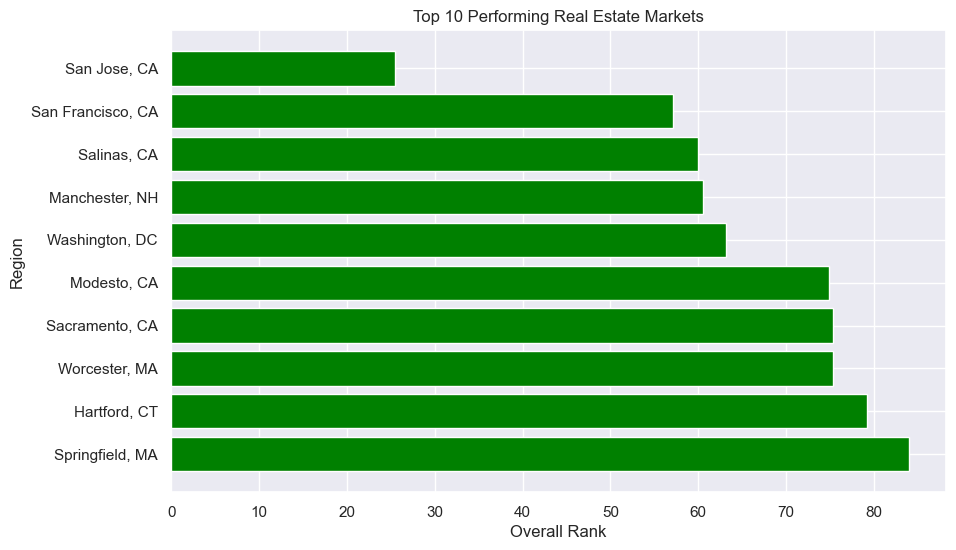

In [98]:

# Bar chart for overall rank
plt.figure(figsize=(10, 6))
plt.barh(top_markets['RegionName'], top_markets['Overall_Rank'], color='green')
plt.xlabel('Overall Rank')
plt.ylabel('Region')
plt.title('Top 10 Performing Real Estate Markets')
plt.gca().invert_yaxis()
plt.show()

### **Bar Chart: Top 10 Performing Real Estate Markets**

### **Why Lower Overall Rank Is Better**

- **Higher Performance Across Metrics**:  
  A lower overall rank means the market consistently excels in the evaluated areas:
  - **Price Growth (ZHVI)**
  - **Rental Returns (ZORI)**
  - **Competitiveness (Market Activity)**

- **Comparative Ranking**:  
  The system ranks markets relative to one another. For example:
  - A market with **Rank 1 for ZHVI**, **Rank 2 for ZORI**, and **Rank 1 for Market Activity** has an **average overall rank of 1.33**, making it highly competitive.
  - A market with **Rank 5, Rank 6, and Rank 7** has an **average overall rank of 6.0**, indicating lower performance compared to the first market.

---

### **Insight 1**
- **San Jose, CA**:  
  If it has the lowest overall rank, it likely performs exceptionally well in price appreciation and market activity, even if its rental yields are moderate.
  
- **Springfield, MA**:  
  If it has a higher overall rank, it might perform well in rental yields but less so in price appreciation or market activity.


### **Insight 2**:
- Markets like **San Jose, CA** and **San Francisco, CA** rank highly due to their strong price appreciation, despite relatively moderate rental yields.
- **Salinas, CA** and **Manchester, NH** offer a mix of competitive rental yields and moderate market activity, making them attractive for investors looking for balanced opportunities.


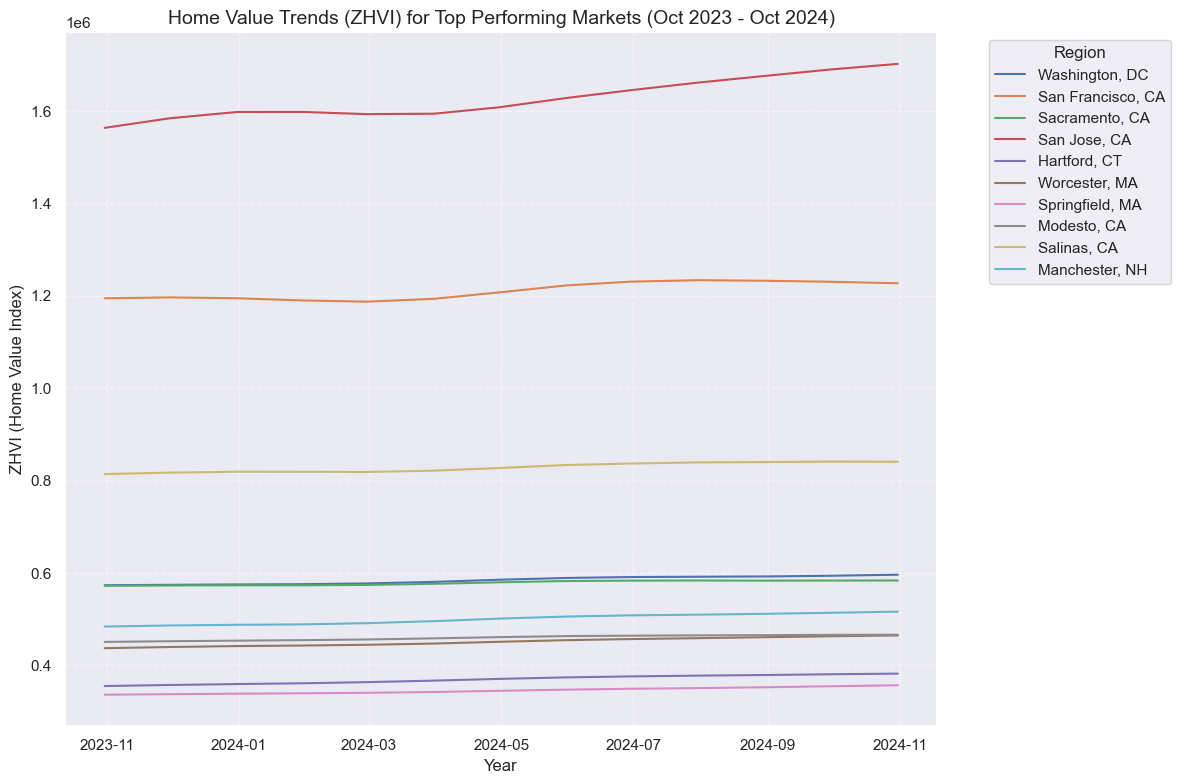

In [101]:
import matplotlib.pyplot as plt

# Extract trends for top market regions from zhvi
top_market_regions = top_markets['RegionName'].unique()
zhvi_trends = zhvi_data[zhvi_data['RegionName'].isin(top_market_regions)]

# Transpose data for plotting (columns as dates, rows as regions)
zhvi_trends = zhvi_trends.set_index('RegionName').drop(['RegionID', 'SizeRank', 'RegionType', 'StateName'], axis=1).T
zhvi_trends.index = pd.to_datetime(zhvi_trends.index)  # Convert dates to datetime for better plotting

# Filter for October 2023 to October 2024
start_date = "2023-10-01"
end_date = "2024-10-31"
zhvi_trends = zhvi_trends[(zhvi_trends.index >= start_date) & (zhvi_trends.index <= end_date)]

# Plot the trends
plt.figure(figsize=(12, 8))
for region in zhvi_trends.columns:
    plt.plot(zhvi_trends.index, zhvi_trends[region], label=region)

plt.title("Home Value Trends (ZHVI) for Top Performing Markets (Oct 2023 - Oct 2024)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("ZHVI (Home Value Index)", fontsize=12)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()


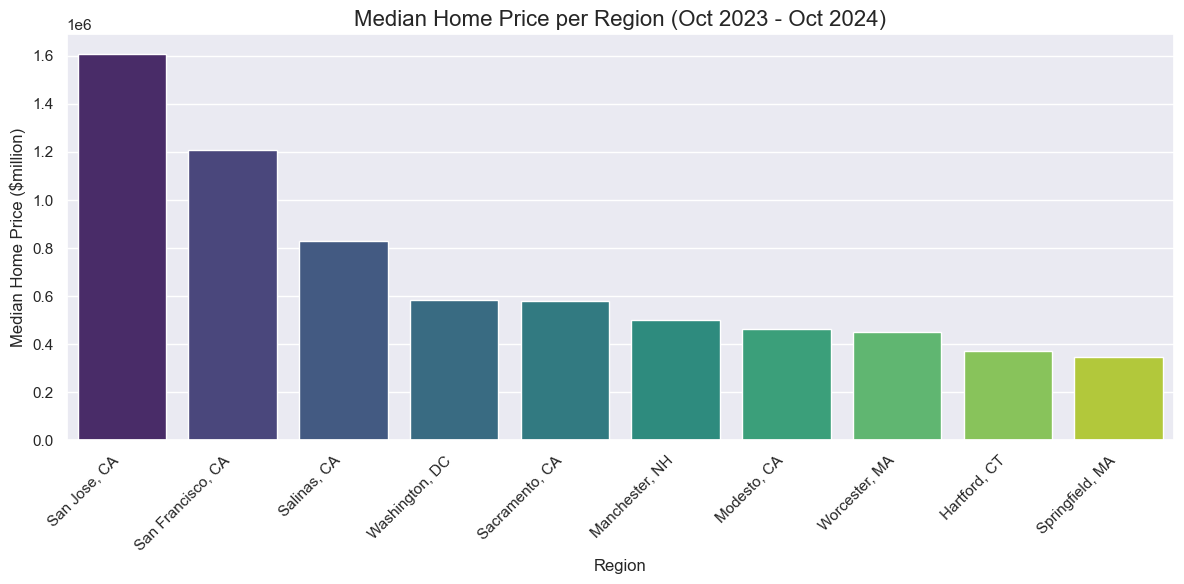

In [103]:
# Filter for October 2023 to October 2024
start_date = "2023-10-01"
end_date = "2024-10-31"
zhvi_trends = zhvi_trends[(zhvi_trends.index >= start_date) & (zhvi_trends.index <= end_date)]

# Calculate the median home price for each region in the date range
median_home_price = zhvi_trends.median().sort_values(ascending=False).reset_index()
median_home_price.columns = ["RegionName", "Median_ZHVI"]

# Plot the median home price per region as a bar graph
plt.figure(figsize=(12, 6))
sns.barplot(data=median_home_price, x="RegionName", y="Median_ZHVI", hue="RegionName", dodge=False, palette="viridis")
plt.title("Median Home Price per Region (Oct 2023 - Oct 2024)", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Median Home Price ($million)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



### **Home Value Trends Visualization**

**Line Chart: Home Value Trends (ZHVI) for Top Performing Markets**

- **What It Shows**:  
  This chart tracks how home values (ZHVI) have changed over time in the top 10 real estate markets. Each line represents the average property value in a market, allowing us to compare their growth trends.

- **Key Insights**:
  1. **Fast-Growing Markets**:  
     Cities like *San Jose, CA* and *San Francisco, CA* show sharp increases in home values, indicating strong demand and rapid appreciation. These markets are great for investors who want to buy, upgrade, and sell quickly to maximize profits.
  2. **Steady Growers**:  
     Areas such as *Salinas, CA* and *Manchester, NH* have slower but consistent growth. These markets are better for long-term investments, as their steady increases suggest stability and lower risk.
  3. **Stable or Cooling Markets**:  
     Some regions with flatter lines might be reaching a peak or cooling off. While these areas may not offer as much price appreciation, they could still be profitable for rental income.

- **Why It Matters**:  
  - Steeper lines show markets where property values are growing rapidly, which can lead to higher profits if you sell soon.  
  - Gradual, steady growth suggests reliable markets where property values are less volatile, making them ideal for long-term investments.  
  - Flat trends indicate stable markets, which might still be good for renting out properties or holding for future appreciation.

- **How to Use This Information**:  
  - If you want quick profits, focus on markets with sharp growth like *San Jose* or *San Francisco*.  
  - For steady income and long-term value, look at consistent growers like *Salinas* or *Springfield*.  
  - The chart helps you decide if a market is still growing, stable, or slowing down, so you can plan your investment accordingly.


### **Conclusion for Question 1: Which US Real Estate Market is Doing Best Overall?**

Based on the analysis, the top-performing real estate markets are determined by their strong performance in price appreciation (ZHVI), rental yields (ZORI), and market activity (temperature index). Markets like **San Jose, CA** and **San Francisco, CA** rank highly due to their consistent price growth and competitive nature. However, regions such as **Salinas, CA** and **Manchester, NH** offer a balance of moderate price appreciation and high rental yields, making them attractive for long-term investments.

- **High Growth Markets**: *San Jose, CA* and *San Francisco, CA* excel in appreciation, ideal for flipping or short-term investments.
- **Balanced Growth and Rental Yield Markets**: *Salinas, CA* and *Springfield, MA* provide steady price growth and strong rental yields, making them favorable for long-term investments.

Overall, the best market depends on your investment strategy. If rapid price appreciation is the priority, focus on competitive markets with high demand. For consistent returns, target markets with a balance of moderate appreciation and strong rental yields.

---

# 2) Are the sale prices and inventory listing going up or down overall in the US? (**Cristian Zendejas**)
---

### Let's start with looking at the new listings throughout the year of 10/2023-10/2024.

In [109]:
df = pd.read_csv("./datasets/for_sale_new_listings_month.csv")
df.head(20)

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,0,United States,country,NaN,323256.0,376081.0,476117.0,509438.0,538099.0,...,248801.0,299401.0,346170.0,383882.0,414294.0,380284.0,356407.0,352692.0,323542.0,318289.0
1,394913,1,"New York, NY",msa,NY,14880.0,22651.0,22492.0,25714.0,25627.0,...,9154.0,10844.0,13074.0,14710.0,15427.0,13472.0,12436.0,10331.0,12037.0,11183.0
2,753899,2,"Los Angeles, CA",msa,CA,8136.0,9261.0,10164.0,10597.0,11556.0,...,5561.0,5894.0,6532.0,7771.0,8294.0,7839.0,7771.0,7372.0,7078.0,6775.0
3,394463,3,"Chicago, IL",msa,IL,8645.0,11908.0,17472.0,16696.0,16869.0,...,5677.0,8329.0,9163.0,10675.0,11589.0,10675.0,10319.0,9942.0,9113.0,8848.0
4,394514,4,"Dallas, TX",msa,TX,7389.0,7894.0,10535.0,11797.0,11995.0,...,6141.0,7975.0,9518.0,10336.0,10662.0,10144.0,9368.0,8795.0,7674.0,7952.0
5,394692,5,"Houston, TX",msa,TX,6335.0,6996.0,9981.0,10048.0,10446.0,...,5440.0,6859.0,7813.0,8549.0,8812.0,8649.0,6543.0,7725.0,6710.0,7042.0
6,395209,6,"Washington, DC",msa,VA,5023.0,6791.0,9830.0,11019.0,10581.0,...,3265.0,4550.0,5699.0,6696.0,7520.0,6408.0,5677.0,5396.0,5999.0,5404.0
7,394974,7,"Philadelphia, PA",msa,PA,5432.0,7048.0,8527.0,9727.0,10074.0,...,3572.0,4686.0,5439.0,6249.0,6835.0,6178.0,5685.0,5623.0,5636.0,5576.0
8,394856,8,"Miami, FL",msa,FL,12468.0,11433.0,12561.0,11157.0,10715.0,...,11183.0,11514.0,10513.0,10653.0,10077.0,9208.0,8955.0,9277.0,9033.0,8766.0
9,394347,9,"Atlanta, GA",msa,GA,6902.0,8117.0,10584.0,11018.0,11152.0,...,5751.0,7172.0,8054.0,8777.0,9169.0,8614.0,7851.0,7959.0,6863.0,7294.0


In [111]:
df.tail(20)

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
902,394805,916,"Los Alamos, NM",msa,NM,24.0,23.0,22.0,36.0,40.0,...,19.0,14.0,15.0,30.0,29.0,27.0,31.0,27.0,39.0,35.0
903,786265,917,"West Point, MS",msa,MS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.0,10.0,9.0,9.0,12.0,10.0
904,394678,918,"Hereford, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,13.0,8.0,11.0,10.0,18.0,8.0,15.0,11.0,10.0,13.0
905,845168,919,"Pearsall, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
906,394330,920,"Andrews, TX",msa,TX,19.0,22.0,28.0,32.0,32.0,...,14.0,23.0,19.0,24.0,17.0,22.0,19.0,13.0,20.0,13.0
907,786253,921,"Brownsville, TN",msa,TN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,16.0,14.0,8.0,10.0,14.0,13.0,13.0,9.0
908,395112,922,"Spirit Lake, IA",msa,IA,37.0,47.0,76.0,56.0,88.0,...,21.0,33.0,42.0,42.0,50.0,41.0,40.0,59.0,36.0,35.0
909,394594,923,"Fitzgerald, GA",msa,GA,8.0,14.0,15.0,13.0,18.0,...,13.0,9.0,14.0,9.0,15.0,5.0,11.0,15.0,15.0,14.0
910,753927,924,"Winnemucca, NV",msa,NV,NaN,NaN,NaN,NaN,NaN,...,13.0,10.0,25.0,16.0,15.0,16.0,15.0,15.0,18.0,17.0
911,394841,925,"Maysville, KY",msa,KY,19.0,22.0,17.0,43.0,38.0,...,18.0,6.0,22.0,17.0,17.0,20.0,16.0,17.0,18.0,13.0


In [113]:
df.dtypes

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
               ...   
2024-06-30    float64
2024-07-31    float64
2024-08-31    float64
2024-09-30    float64
2024-10-31    float64
Length: 87, dtype: object

In [115]:
start_date = '2018-01-31'
end_date = '2022-12-31'

df = df.drop(index=0).reset_index(drop=True)

date_columns = [col for col in df.columns if pd.to_datetime(col, errors='coerce', format='%Y-%m-%d', exact=True) is not pd.NaT]

columns_to_drop = [col for col in date_columns if start_date <= col <= end_date]
df = df.drop(columns=columns_to_drop)

df["RegionName"] = df["RegionName"].apply(lambda x: x.split(',')[0])
df.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,394913,1,New York,msa,NY,9754.0,10439.0,14598.0,13820.0,14360.0,...,9154.0,10844.0,13074.0,14710.0,15427.0,13472.0,12436.0,10331.0,12037.0,11183.0
1,753899,2,Los Angeles,msa,CA,4699.0,4988.0,6370.0,6156.0,6831.0,...,5561.0,5894.0,6532.0,7771.0,8294.0,7839.0,7771.0,7372.0,7078.0,6775.0
2,394463,3,Chicago,msa,IL,6043.0,7047.0,9530.0,9649.0,10865.0,...,5677.0,8329.0,9163.0,10675.0,11589.0,10675.0,10319.0,9942.0,9113.0,8848.0
3,394514,4,Dallas,msa,TX,5188.0,5291.0,8159.0,8879.0,9467.0,...,6141.0,7975.0,9518.0,10336.0,10662.0,10144.0,9368.0,8795.0,7674.0,7952.0
4,394692,5,Houston,msa,TX,5309.0,5567.0,7755.0,7305.0,7893.0,...,5440.0,6859.0,7813.0,8549.0,8812.0,8649.0,6543.0,7725.0,6710.0,7042.0
5,395209,6,Washington,msa,VA,3628.0,4096.0,6589.0,6329.0,6434.0,...,3265.0,4550.0,5699.0,6696.0,7520.0,6408.0,5677.0,5396.0,5999.0,5404.0
6,394974,7,Philadelphia,msa,PA,3981.0,4354.0,5888.0,5793.0,6090.0,...,3572.0,4686.0,5439.0,6249.0,6835.0,6178.0,5685.0,5623.0,5636.0,5576.0
7,394856,8,Miami,msa,FL,9175.0,8727.0,9678.0,8372.0,9086.0,...,11183.0,11514.0,10513.0,10653.0,10077.0,9208.0,8955.0,9277.0,9033.0,8766.0
8,394347,9,Atlanta,msa,GA,4895.0,5426.0,7249.0,6522.0,7427.0,...,5751.0,7172.0,8054.0,8777.0,9169.0,8614.0,7851.0,7959.0,6863.0,7294.0
9,394404,10,Boston,msa,MA,2416.0,2636.0,4458.0,4163.0,5062.0,...,2538.0,2993.0,3692.0,5024.0,5856.0,4788.0,3755.0,3143.0,4895.0,4016.0


In [117]:
df.count()

RegionID      921
SizeRank      921
RegionName    921
RegionType    921
StateName     921
2023-01-31    898
2023-02-28    902
2023-03-31    901
2023-04-30    901
2023-05-31    901
2023-06-30    902
2023-07-31    903
2023-08-31    902
2023-09-30    903
2023-10-31    903
2023-11-30    903
2023-12-31    903
2024-01-31    907
2024-02-29    908
2024-03-31    911
2024-04-30    913
2024-05-31    913
2024-06-30    915
2024-07-31    915
2024-08-31    915
2024-09-30    918
2024-10-31    921
dtype: int64

### Renaming some columns since the originals are a little lengthy and my changes on one column are different.

In [120]:
df = df.rename(columns={"SizeRank": "Rank", "RegionName": "City", "StateName": "State"})
df.head(10)

,RegionID,Rank,City,RegionType,State,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,394913,1,New York,msa,NY,9754.0,10439.0,14598.0,13820.0,14360.0,...,9154.0,10844.0,13074.0,14710.0,15427.0,13472.0,12436.0,10331.0,12037.0,11183.0
1,753899,2,Los Angeles,msa,CA,4699.0,4988.0,6370.0,6156.0,6831.0,...,5561.0,5894.0,6532.0,7771.0,8294.0,7839.0,7771.0,7372.0,7078.0,6775.0
2,394463,3,Chicago,msa,IL,6043.0,7047.0,9530.0,9649.0,10865.0,...,5677.0,8329.0,9163.0,10675.0,11589.0,10675.0,10319.0,9942.0,9113.0,8848.0
3,394514,4,Dallas,msa,TX,5188.0,5291.0,8159.0,8879.0,9467.0,...,6141.0,7975.0,9518.0,10336.0,10662.0,10144.0,9368.0,8795.0,7674.0,7952.0
4,394692,5,Houston,msa,TX,5309.0,5567.0,7755.0,7305.0,7893.0,...,5440.0,6859.0,7813.0,8549.0,8812.0,8649.0,6543.0,7725.0,6710.0,7042.0
5,395209,6,Washington,msa,VA,3628.0,4096.0,6589.0,6329.0,6434.0,...,3265.0,4550.0,5699.0,6696.0,7520.0,6408.0,5677.0,5396.0,5999.0,5404.0
6,394974,7,Philadelphia,msa,PA,3981.0,4354.0,5888.0,5793.0,6090.0,...,3572.0,4686.0,5439.0,6249.0,6835.0,6178.0,5685.0,5623.0,5636.0,5576.0
7,394856,8,Miami,msa,FL,9175.0,8727.0,9678.0,8372.0,9086.0,...,11183.0,11514.0,10513.0,10653.0,10077.0,9208.0,8955.0,9277.0,9033.0,8766.0
8,394347,9,Atlanta,msa,GA,4895.0,5426.0,7249.0,6522.0,7427.0,...,5751.0,7172.0,8054.0,8777.0,9169.0,8614.0,7851.0,7959.0,6863.0,7294.0
9,394404,10,Boston,msa,MA,2416.0,2636.0,4458.0,4163.0,5062.0,...,2538.0,2993.0,3692.0,5024.0,5856.0,4788.0,3755.0,3143.0,4895.0,4016.0


### Let's start seeing if there are any duplicates we need to remove.

In [123]:
df.shape

(921, 27)

In [125]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 27)


In [127]:
df.count()

RegionID      921
Rank          921
City          921
RegionType    921
State         921
2023-01-31    898
2023-02-28    902
2023-03-31    901
2023-04-30    901
2023-05-31    901
2023-06-30    902
2023-07-31    903
2023-08-31    902
2023-09-30    903
2023-10-31    903
2023-11-30    903
2023-12-31    903
2024-01-31    907
2024-02-29    908
2024-03-31    911
2024-04-30    913
2024-05-31    913
2024-06-30    915
2024-07-31    915
2024-08-31    915
2024-09-30    918
2024-10-31    921
dtype: int64

In [129]:
df = df.drop_duplicates()
df.count()

RegionID      921
Rank          921
City          921
RegionType    921
State         921
2023-01-31    898
2023-02-28    902
2023-03-31    901
2023-04-30    901
2023-05-31    901
2023-06-30    902
2023-07-31    903
2023-08-31    902
2023-09-30    903
2023-10-31    903
2023-11-30    903
2023-12-31    903
2024-01-31    907
2024-02-29    908
2024-03-31    911
2024-04-30    913
2024-05-31    913
2024-06-30    915
2024-07-31    915
2024-08-31    915
2024-09-30    918
2024-10-31    921
dtype: int64

### Now let's drop null or NaN values.

In [132]:
print(df.isnull().sum())

RegionID       0
Rank           0
City           0
RegionType     0
State          0
2023-01-31    23
2023-02-28    19
2023-03-31    20
2023-04-30    20
2023-05-31    20
2023-06-30    19
2023-07-31    18
2023-08-31    19
2023-09-30    18
2023-10-31    18
2023-11-30    18
2023-12-31    18
2024-01-31    14
2024-02-29    13
2024-03-31    10
2024-04-30     8
2024-05-31     8
2024-06-30     6
2024-07-31     6
2024-08-31     6
2024-09-30     3
2024-10-31     0
dtype: int64


In [134]:
df = df.dropna()
df.count()

RegionID      887
Rank          887
City          887
RegionType    887
State         887
2023-01-31    887
2023-02-28    887
2023-03-31    887
2023-04-30    887
2023-05-31    887
2023-06-30    887
2023-07-31    887
2023-08-31    887
2023-09-30    887
2023-10-31    887
2023-11-30    887
2023-12-31    887
2024-01-31    887
2024-02-29    887
2024-03-31    887
2024-04-30    887
2024-05-31    887
2024-06-30    887
2024-07-31    887
2024-08-31    887
2024-09-30    887
2024-10-31    887
dtype: int64

In [136]:
print(df.isnull().sum())

RegionID      0
Rank          0
City          0
RegionType    0
State         0
2023-01-31    0
2023-02-28    0
2023-03-31    0
2023-04-30    0
2023-05-31    0
2023-06-30    0
2023-07-31    0
2023-08-31    0
2023-09-30    0
2023-10-31    0
2023-11-30    0
2023-12-31    0
2024-01-31    0
2024-02-29    0
2024-03-31    0
2024-04-30    0
2024-05-31    0
2024-06-30    0
2024-07-31    0
2024-08-31    0
2024-09-30    0
2024-10-31    0
dtype: int64


In [138]:
df.head(5)

,RegionID,Rank,City,RegionType,State,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,394913,1,New York,msa,NY,9754.0,10439.0,14598.0,13820.0,14360.0,...,9154.0,10844.0,13074.0,14710.0,15427.0,13472.0,12436.0,10331.0,12037.0,11183.0
1,753899,2,Los Angeles,msa,CA,4699.0,4988.0,6370.0,6156.0,6831.0,...,5561.0,5894.0,6532.0,7771.0,8294.0,7839.0,7771.0,7372.0,7078.0,6775.0
2,394463,3,Chicago,msa,IL,6043.0,7047.0,9530.0,9649.0,10865.0,...,5677.0,8329.0,9163.0,10675.0,11589.0,10675.0,10319.0,9942.0,9113.0,8848.0
3,394514,4,Dallas,msa,TX,5188.0,5291.0,8159.0,8879.0,9467.0,...,6141.0,7975.0,9518.0,10336.0,10662.0,10144.0,9368.0,8795.0,7674.0,7952.0
4,394692,5,Houston,msa,TX,5309.0,5567.0,7755.0,7305.0,7893.0,...,5440.0,6859.0,7813.0,8549.0,8812.0,8649.0,6543.0,7725.0,6710.0,7042.0


### Now let's look for any outliers in the date columns.

<Axes: xlabel='2023-09-30'>

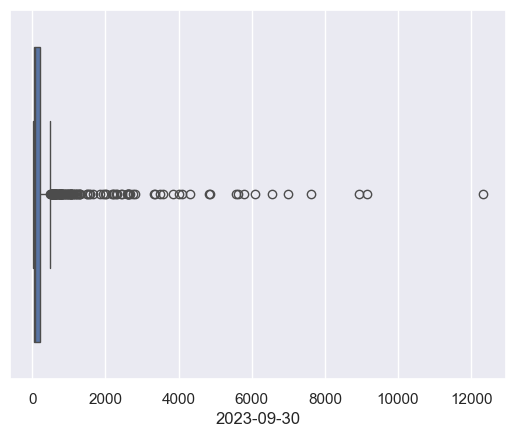

In [141]:
sns.boxplot(x=df['2023-09-30'])

<Axes: xlabel='2023-10-31'>

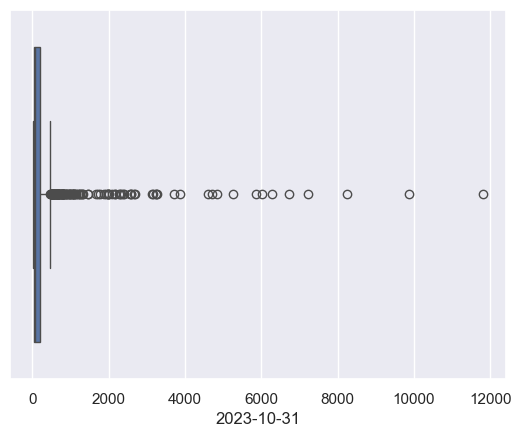

In [143]:
sns.boxplot(x=df['2023-10-31'])

<Axes: xlabel='2023-11-30'>

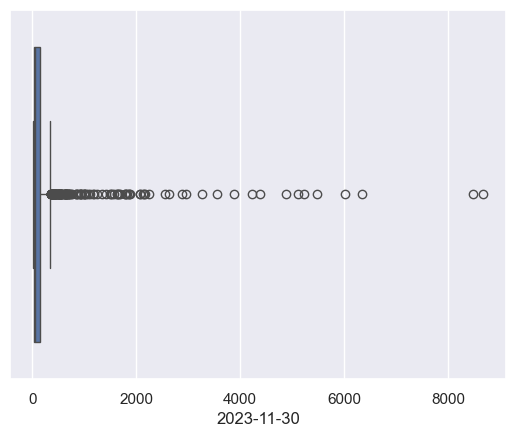

In [145]:
sns.boxplot(x=df['2023-11-30'])

<Axes: xlabel='2023-12-31'>

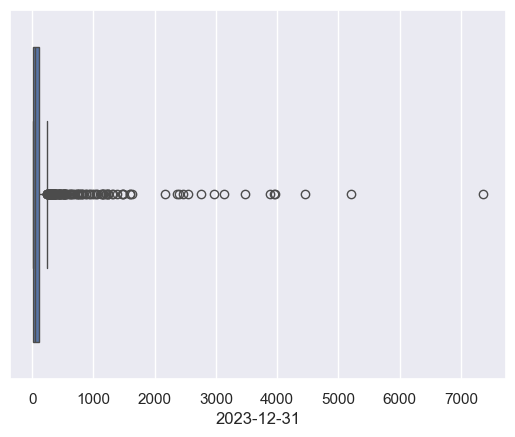

In [146]:
sns.boxplot(x=df['2023-12-31'])

<Axes: xlabel='2024-01-31'>

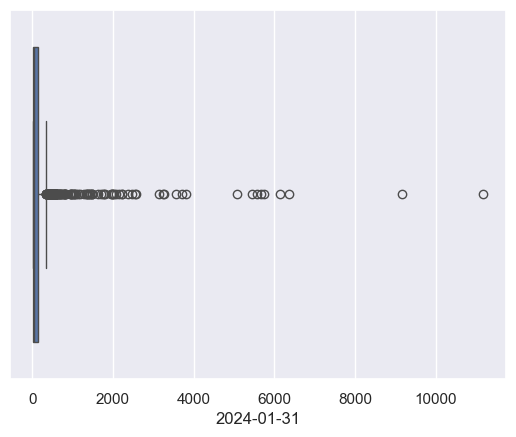

In [147]:
sns.boxplot(x=df['2024-01-31'])

<Axes: xlabel='2024-02-29'>

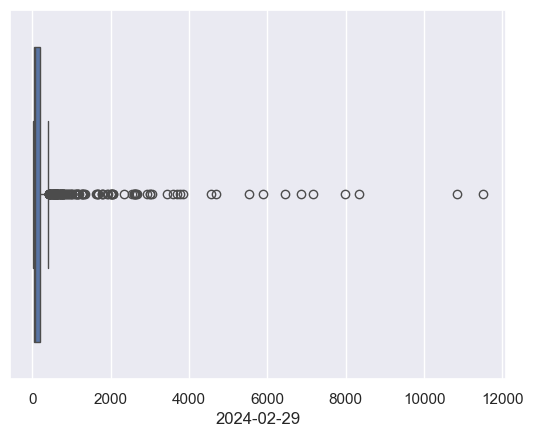

In [149]:
sns.boxplot(x=df['2024-02-29'])

<Axes: xlabel='2024-03-31'>

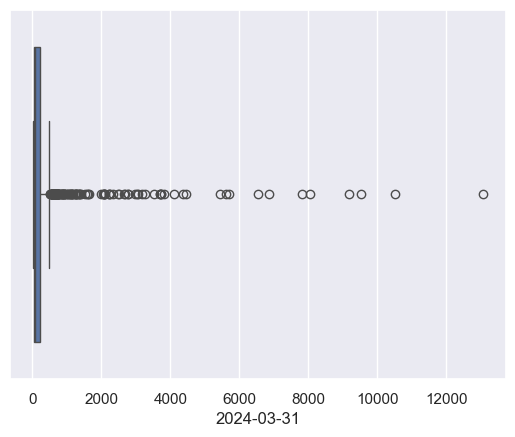

In [150]:
sns.boxplot(x=df['2024-03-31'])

<Axes: xlabel='2024-04-30'>

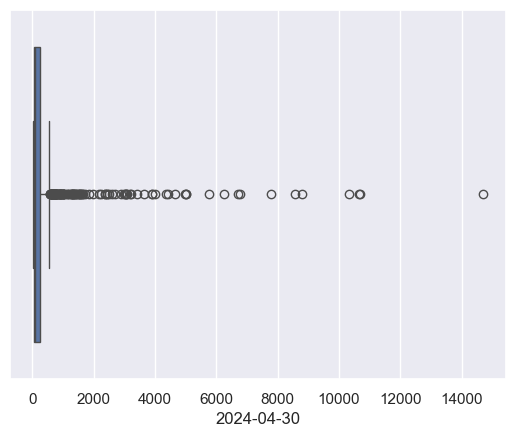

In [152]:
sns.boxplot(x=df['2024-04-30'])

<Axes: xlabel='2024-05-31'>

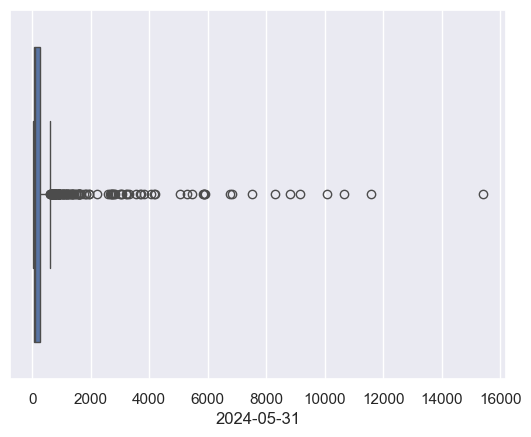

In [153]:
sns.boxplot(x=df['2024-05-31'])

<Axes: xlabel='2024-06-30'>

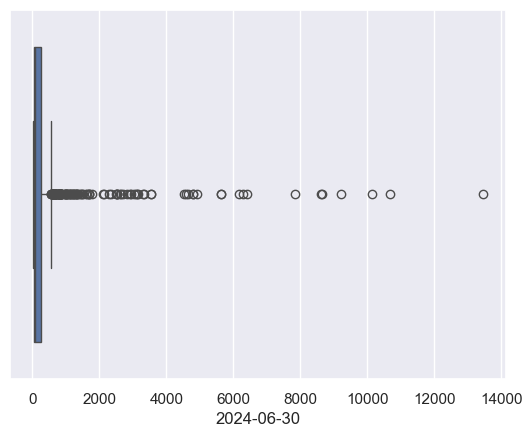

In [155]:
sns.boxplot(x=df['2024-06-30'])

<Axes: xlabel='2024-07-31'>

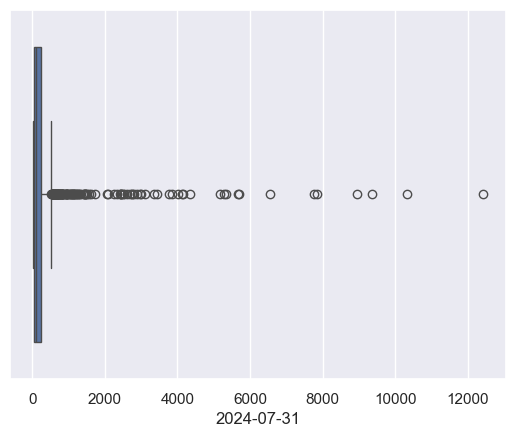

In [156]:
sns.boxplot(x=df['2024-07-31'])

<Axes: xlabel='2024-08-31'>

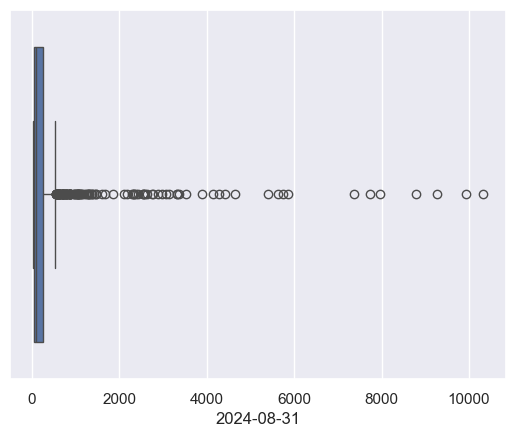

In [158]:
sns.boxplot(x=df['2024-08-31'])

<Axes: xlabel='2024-09-30'>

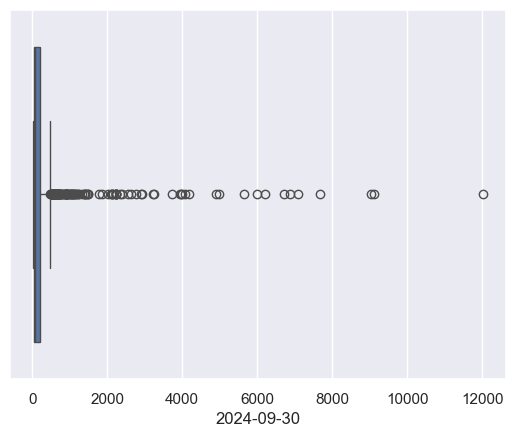

In [159]:
sns.boxplot(x=df['2024-09-30'])

<Axes: xlabel='2024-10-31'>

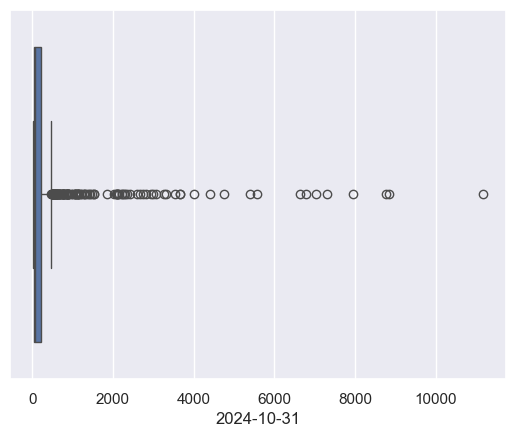

In [160]:
sns.boxplot(x=df['2024-10-31'])

### Looking at all the charts for the date columns I'm seeing very little variation around the median for the data. It looks like a lot of the values were considered outliers, but if everything is an outlier than I'm assuming nothing is. For this reason, I'm not removing any of the data that is considered outliers.

In [163]:
date_columns = [col for col in df.columns if pd.to_datetime(col, errors='coerce', format='%Y-%m-%d', exact=True) is not pd.NaT]

date_df = df[date_columns]
Q1 = date_df.quantile(0.25)
Q3 = date_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

2023-01-31    122.5
2023-02-28    129.0
2023-03-31    183.5
2023-04-30    193.5
2023-05-31    201.5
2023-06-30    207.0
2023-07-31    182.5
2023-08-31    191.0
2023-09-30    179.0
2023-10-31    169.0
2023-11-30    128.0
2023-12-31     86.5
2024-01-31    123.5
2024-02-29    153.0
2024-03-31    182.0
2024-04-30    209.5
2024-05-31    223.0
2024-06-30    205.5
2024-07-31    193.0
2024-08-31    197.0
2024-09-30    170.5
2024-10-31    168.0
dtype: float64


### Let's look at the total listings for each state by year 2024 vs 2023.

### As mentioned above I'll only use the months of January-October for both years

In [169]:
drop_nov_dec = ['2023-11-30', '2023-12-31']
df = df.drop(columns=drop_nov_dec)

In [171]:
dates_2023 = [col for col in df.columns if col.startswith('2023')]
dates_2024 = [col for col in df.columns if col.startswith('2024')]

df['TotalListings_2023'] = df[dates_2023].sum(axis=1)
df['TotalListings_2024'] = df[dates_2024].sum(axis=1)

state_totals_2023 = df.groupby('State')['TotalListings_2023'].sum()
state_totals_2024 = df.groupby('State')['TotalListings_2024'].sum()

state_totals_comparison = pd.DataFrame({
    '2023 Listings': state_totals_2023,
    '2024 Listings': state_totals_2024
}).sort_values(by='2023 Listings', ascending=False)

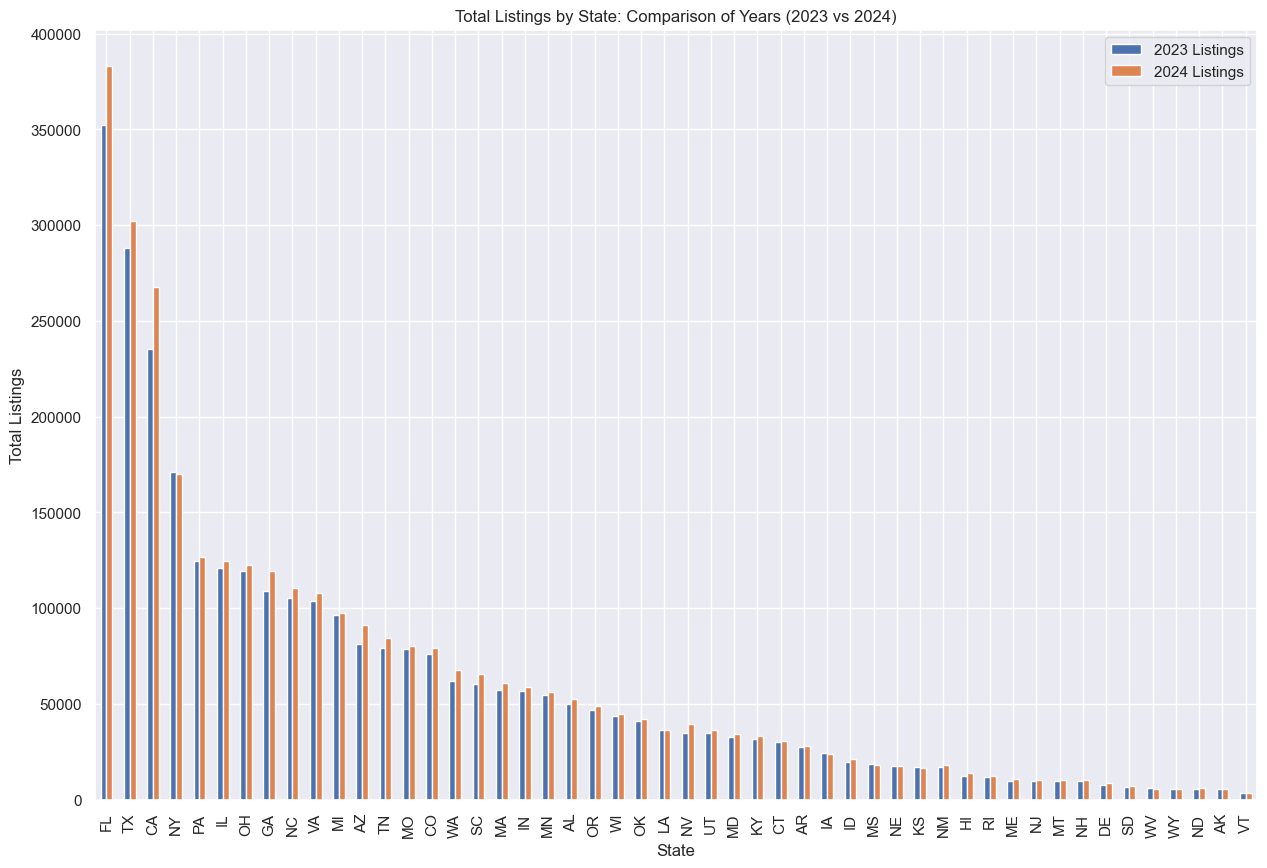

In [173]:
state_totals_comparison.plot(kind='bar', figsize=(15,10))
plt.title("Total Listings by State: Comparison of Years (2023 vs 2024)")
plt.xlabel('State')
plt.ylabel("Total Listings")
plt.show()

### Florida seems to be a clear winner in terms of listings each year having the most both years.

### Now let's look at the total listings by month compared by years.

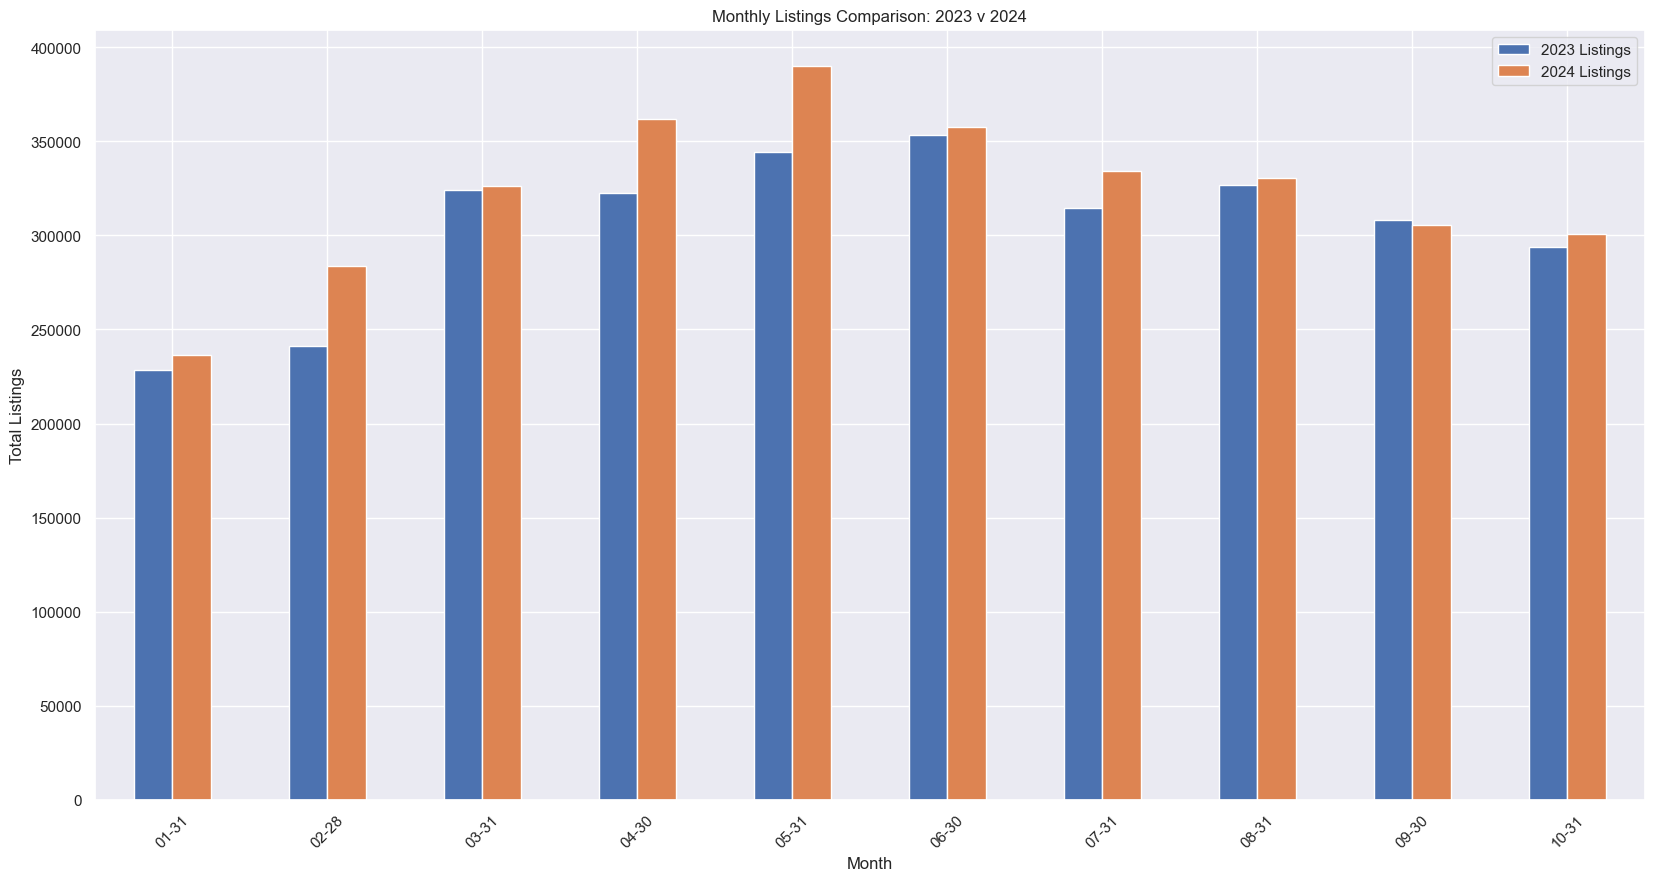

In [181]:
monthly_totals_2023 = df[dates_2023].sum()
monthly_totals_2024 = df[dates_2024].sum()

comparison_df = pd.DataFrame({
    'Month': monthly_totals_2023.index.str.slice(5),
    '2023 Listings': monthly_totals_2023.values,
    '2024 Listings': monthly_totals_2024.values,
})

comparison_df.plot(x='Month', kind='bar', figsize=(20,10))
plt.title("Monthly Listings Comparison: 2023 v 2024")
plt.xlabel("Month")
plt.ylabel("Total Listings")
plt.xticks(rotation=45)
plt.show()

### We can definitely see that 2024 overall had more listings than 2023. The peak of 2024 was in May while in 2023 it was June.

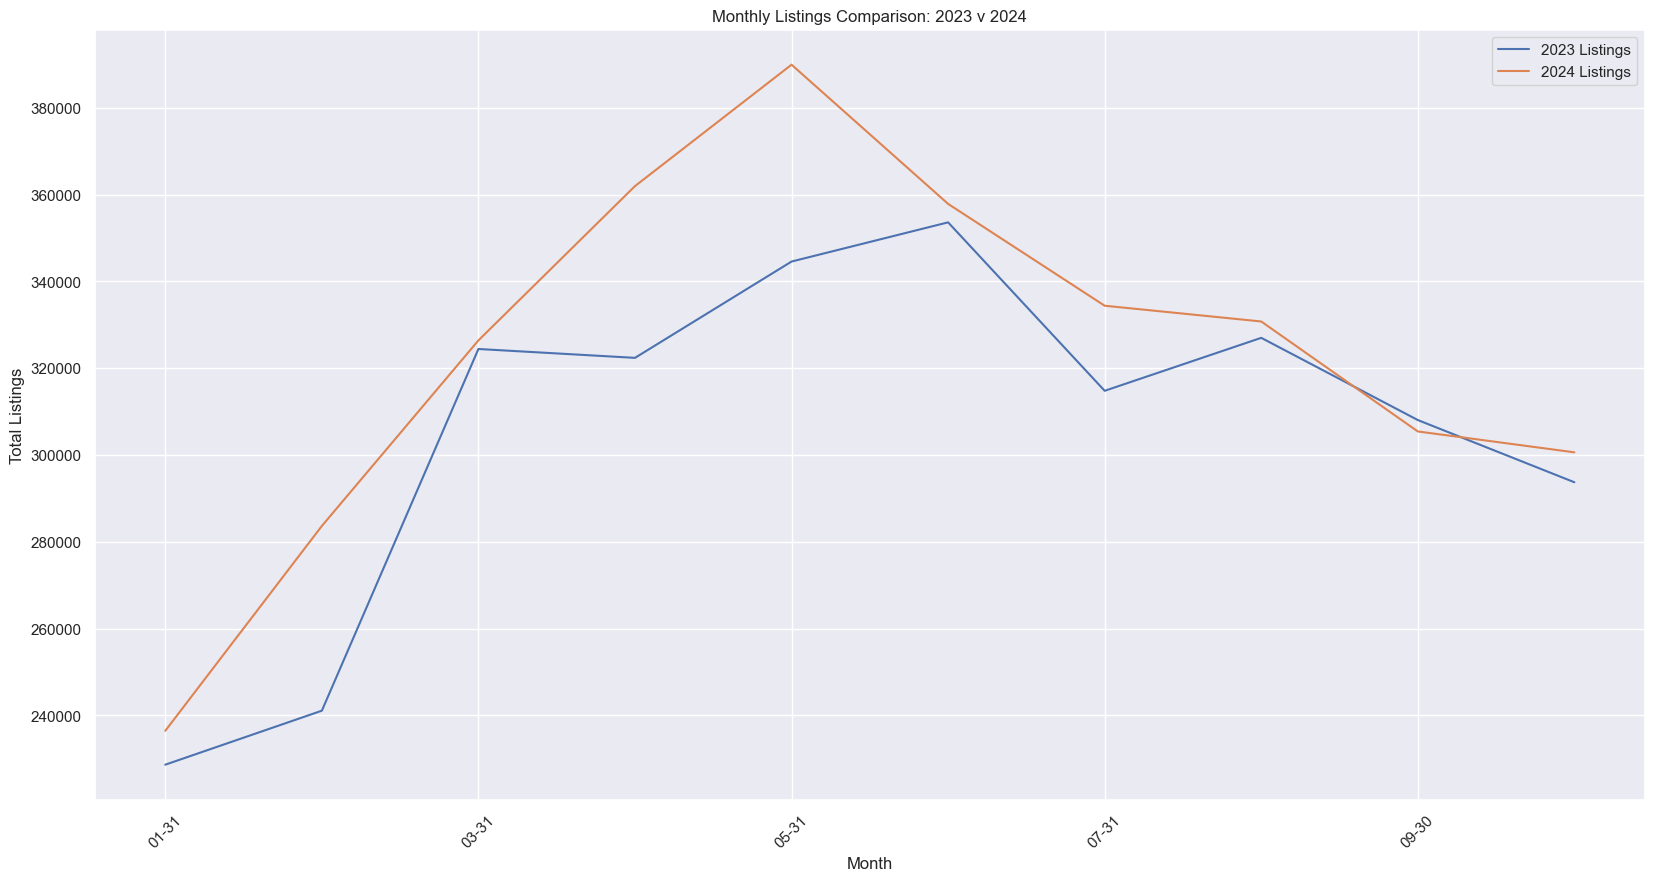

In [184]:
comparison_df.plot(x='Month', kind='line', figsize=(20,10))
plt.title("Monthly Listings Comparison: 2023 v 2024")
plt.xlabel("Month")
plt.ylabel("Total Listings")
plt.xticks(rotation=45)
plt.show()

### When comparing the years for the same months January - October, we see that overall 2024 has had more listings most of the year then 2023. The listings peaked in May of 2024 and as we approached the winter months, they have steadily declined. Overall it looks like listings are going down now that we are past the summer months.

### Now let's take a look at the listing sale prices and see if they have been increasing in 2024 vs 2023.

In [189]:
price_df = pd.read_csv("./datasets/Median_list_price_month.csv")
price_df.head(20)

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,0,United States,country,NaN,255000.0,264900.0,269900.0,279000.0,281000.0,...,379000.0,385000.0,394000.0,399900.0,407900.0,409900.0,400000.0,399900.0,399900.0,399000.0
1,394913,1,"New York, NY",msa,NY,489000.0,505000.0,515000.0,519000.0,529900.0,...,685000.0,699000.0,699000.0,700000.0,719999.0,719000.0,709000.0,699990.0,719900.0,725000.0
2,753899,2,"Los Angeles, CA",msa,CA,709000.0,725000.0,730000.0,750000.0,750000.0,...,988000.0,999000.0,999900.0,1049000.0,1089000.0,1099000.0,1098000.0,1074950.0,1060000.0,1050000.0
3,394463,3,"Chicago, IL",msa,IL,269900.0,289000.0,294900.0,299900.0,307000.0,...,320000.0,330000.0,339900.0,350000.0,359900.0,359900.0,355000.0,349900.0,350000.0,340000.0
4,394514,4,"Dallas, TX",msa,TX,318000.0,325000.0,325990.0,334500.0,334900.0,...,410000.0,415000.0,424900.0,434000.0,439900.0,440000.0,435000.0,429000.0,428595.0,425000.0
5,394692,5,"Houston, TX",msa,TX,289500.0,294900.0,299000.0,299900.0,299999.0,...,349950.0,350000.0,359000.0,365000.0,367000.0,365000.0,365999.0,365000.0,359900.0,355000.0
6,395209,6,"Washington, DC",msa,VA,392000.0,400000.0,424900.0,435000.0,439900.0,...,530000.0,549900.0,575000.0,598250.0,599000.0,595000.0,579000.0,565000.0,575000.0,570000.0
7,394974,7,"Philadelphia, PA",msa,PA,219000.0,225000.0,232500.0,244900.0,250000.0,...,300000.0,315000.0,325000.0,346200.0,359000.0,364900.0,355000.0,350000.0,350000.0,349900.0
8,394856,8,"Miami, FL",msa,FL,364900.0,365900.0,369000.0,369900.0,374300.0,...,535000.0,529000.0,525000.0,520000.0,520000.0,520000.0,515000.0,514900.0,510000.0,509450.0
9,394347,9,"Atlanta, GA",msa,GA,272000.0,279900.0,289900.0,299900.0,300000.0,...,374900.0,375000.0,380000.0,389000.0,399000.0,398988.0,395000.0,390000.0,389500.0,389000.0


In [191]:
price_df.tail(20)

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
908,845168,919,"Pearsall, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,225000.0,215000.0,234667.0,200000.0,227225.0,230000.0,235000.0,230000.0,251300.0,257000.0
909,394330,920,"Andrews, TX",msa,TX,220000.0,215750.0,214000.0,228000.0,240000.0,...,257000.0,294000.0,282500.0,290500.0,293000.0,275500.0,264000.0,284950.0,327000.0,302450.0
910,786253,921,"Brownsville, TN",msa,TN,NaN,NaN,NaN,NaN,NaN,...,234000.0,234000.0,229950.0,236950.0,220950.0,205950.0,199900.0,197450.0,222500.0,248450.0
911,395112,922,"Spirit Lake, IA",msa,IA,249000.0,258500.0,271900.0,289900.0,289900.0,...,441950.0,424900.0,414900.0,424500.0,459900.0,459900.0,459900.0,577000.0,549900.0,544900.0
912,394594,923,"Fitzgerald, GA",msa,GA,100000.0,89999.0,89900.0,94500.0,94500.0,...,162500.0,166750.0,166750.0,167000.0,165000.0,165000.0,185000.0,194900.0,189900.0,179900.0
913,753927,924,"Winnemucca, NV",msa,NV,210000.0,210000.0,214000.0,218000.0,215000.0,...,339800.0,339800.0,369900.0,369900.0,345000.0,359999.0,369900.0,347500.0,369900.0,369900.0
914,394841,925,"Maysville, KY",msa,KY,127500.0,126450.0,132000.0,129950.0,132000.0,...,164900.0,195000.0,200000.0,204500.0,194750.0,194900.0,194900.0,218950.0,229000.0,214500.0
915,395104,926,"Snyder, TX",msa,TX,139950.0,133000.0,129900.0,138000.0,139000.0,...,152450.0,142000.0,165000.0,142000.0,165000.0,190000.0,184000.0,149450.0,159500.0,162000.0
916,394676,927,"Helena, AR",msa,AR,NaN,NaN,NaN,NaN,NaN,...,119000.0,89250.0,142450.0,129900.0,127450.0,140500.0,165000.0,141000.0,133000.0,125500.0
917,395111,928,"Spencer, IA",msa,IA,144500.0,141250.0,152400.0,149900.0,154900.0,...,215000.0,234900.0,234000.0,218000.0,225000.0,219000.0,217250.0,192250.0,183750.0,186250.0


### The data is very similar to the new listings data, so we'll remove the first row and only use the 2023 & 2024 years again to compare the same months.

In [194]:
price_start_date = '2018-01-31'
price_end_date = '2022-12-31'

price_df = price_df.drop(index=0).reset_index(drop=True)

price_date_columns = [col for col in price_df.columns if pd.to_datetime(col, errors='coerce', format='%Y-%m-%d', exact=True) is not pd.NaT]

columns_to_drop = [col for col in price_date_columns if price_start_date <= col <= price_end_date]
price_df = price_df.drop(columns=columns_to_drop)

price_df["RegionName"] = price_df["RegionName"].apply(lambda x: x.split(',')[0])
price_df.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,394913,1,New York,msa,NY,620000.0,635000.0,649900.0,659000.0,679000.0,...,685000.0,699000.0,699000.0,700000.0,719999.0,719000.0,709000.0,699990.0,719900.0,725000.0
1,753899,2,Los Angeles,msa,CA,879900.0,899000.0,900000.0,949000.0,979000.0,...,988000.0,999000.0,999900.0,1049000.0,1089000.0,1099000.0,1098000.0,1074950.0,1060000.0,1050000.0
2,394463,3,Chicago,msa,IL,299000.0,308500.0,319000.0,329900.0,339600.0,...,320000.0,330000.0,339900.0,350000.0,359900.0,359900.0,355000.0,349900.0,350000.0,340000.0
3,394514,4,Dallas,msa,TX,395000.0,396000.0,409450.0,429990.0,440000.0,...,410000.0,415000.0,424900.0,434000.0,439900.0,440000.0,435000.0,429000.0,428595.0,425000.0
4,394692,5,Houston,msa,TX,340000.0,344900.0,349900.0,359900.0,365000.0,...,349950.0,350000.0,359000.0,365000.0,367000.0,365000.0,365999.0,365000.0,359900.0,355000.0
5,395209,6,Washington,msa,VA,499900.0,519900.0,550000.0,559990.0,569900.0,...,530000.0,549900.0,575000.0,598250.0,599000.0,595000.0,579000.0,565000.0,575000.0,570000.0
6,394974,7,Philadelphia,msa,PA,290000.0,295000.0,299999.0,315000.0,324900.0,...,300000.0,315000.0,325000.0,346200.0,359000.0,364900.0,355000.0,350000.0,350000.0,349900.0
7,394856,8,Miami,msa,FL,539000.0,539900.0,545000.0,550000.0,550000.0,...,535000.0,529000.0,525000.0,520000.0,520000.0,520000.0,515000.0,514900.0,510000.0,509450.0
8,394347,9,Atlanta,msa,GA,355000.0,359900.0,369900.0,379900.0,390000.0,...,374900.0,375000.0,380000.0,389000.0,399000.0,398988.0,395000.0,390000.0,389500.0,389000.0
9,394404,10,Boston,msa,MA,700000.0,739450.0,749900.0,759000.0,789000.0,...,739900.0,755000.0,775000.0,789900.0,799000.0,779000.0,769000.0,749900.0,769000.0,759900.0


In [196]:
price_df.dtypes

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
2023-01-31    float64
2023-02-28    float64
2023-03-31    float64
2023-04-30    float64
2023-05-31    float64
2023-06-30    float64
2023-07-31    float64
2023-08-31    float64
2023-09-30    float64
2023-10-31    float64
2023-11-30    float64
2023-12-31    float64
2024-01-31    float64
2024-02-29    float64
2024-03-31    float64
2024-04-30    float64
2024-05-31    float64
2024-06-30    float64
2024-07-31    float64
2024-08-31    float64
2024-09-30    float64
2024-10-31    float64
dtype: object

In [198]:
price_df.count()

RegionID      927
SizeRank      927
RegionName    927
RegionType    927
StateName     927
2023-01-31    919
2023-02-28    921
2023-03-31    915
2023-04-30    920
2023-05-31    920
2023-06-30    919
2023-07-31    919
2023-08-31    922
2023-09-30    922
2023-10-31    924
2023-11-30    923
2023-12-31    922
2024-01-31    923
2024-02-29    923
2024-03-31    924
2024-04-30    922
2024-05-31    926
2024-06-30    926
2024-07-31    927
2024-08-31    927
2024-09-30    926
2024-10-31    926
dtype: int64

### Just like before we'll rename the columns.

In [201]:
price_df = price_df.rename(columns={"SizeRank": "Rank", "RegionName": "City", "StateName": "State"})
price_df.head(10)

,RegionID,Rank,City,RegionType,State,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,394913,1,New York,msa,NY,620000.0,635000.0,649900.0,659000.0,679000.0,...,685000.0,699000.0,699000.0,700000.0,719999.0,719000.0,709000.0,699990.0,719900.0,725000.0
1,753899,2,Los Angeles,msa,CA,879900.0,899000.0,900000.0,949000.0,979000.0,...,988000.0,999000.0,999900.0,1049000.0,1089000.0,1099000.0,1098000.0,1074950.0,1060000.0,1050000.0
2,394463,3,Chicago,msa,IL,299000.0,308500.0,319000.0,329900.0,339600.0,...,320000.0,330000.0,339900.0,350000.0,359900.0,359900.0,355000.0,349900.0,350000.0,340000.0
3,394514,4,Dallas,msa,TX,395000.0,396000.0,409450.0,429990.0,440000.0,...,410000.0,415000.0,424900.0,434000.0,439900.0,440000.0,435000.0,429000.0,428595.0,425000.0
4,394692,5,Houston,msa,TX,340000.0,344900.0,349900.0,359900.0,365000.0,...,349950.0,350000.0,359000.0,365000.0,367000.0,365000.0,365999.0,365000.0,359900.0,355000.0
5,395209,6,Washington,msa,VA,499900.0,519900.0,550000.0,559990.0,569900.0,...,530000.0,549900.0,575000.0,598250.0,599000.0,595000.0,579000.0,565000.0,575000.0,570000.0
6,394974,7,Philadelphia,msa,PA,290000.0,295000.0,299999.0,315000.0,324900.0,...,300000.0,315000.0,325000.0,346200.0,359000.0,364900.0,355000.0,350000.0,350000.0,349900.0
7,394856,8,Miami,msa,FL,539000.0,539900.0,545000.0,550000.0,550000.0,...,535000.0,529000.0,525000.0,520000.0,520000.0,520000.0,515000.0,514900.0,510000.0,509450.0
8,394347,9,Atlanta,msa,GA,355000.0,359900.0,369900.0,379900.0,390000.0,...,374900.0,375000.0,380000.0,389000.0,399000.0,398988.0,395000.0,390000.0,389500.0,389000.0
9,394404,10,Boston,msa,MA,700000.0,739450.0,749900.0,759000.0,789000.0,...,739900.0,755000.0,775000.0,789900.0,799000.0,779000.0,769000.0,749900.0,769000.0,759900.0


In [203]:
price_df.shape

(927, 27)

In [205]:
duplicate_rows_df = price_df[price_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 27)


In [207]:
price_df.count()

RegionID      927
Rank          927
City          927
RegionType    927
State         927
2023-01-31    919
2023-02-28    921
2023-03-31    915
2023-04-30    920
2023-05-31    920
2023-06-30    919
2023-07-31    919
2023-08-31    922
2023-09-30    922
2023-10-31    924
2023-11-30    923
2023-12-31    922
2024-01-31    923
2024-02-29    923
2024-03-31    924
2024-04-30    922
2024-05-31    926
2024-06-30    926
2024-07-31    927
2024-08-31    927
2024-09-30    926
2024-10-31    926
dtype: int64

In [209]:
price_df = price_df.drop_duplicates()
price_df.head(10)

,RegionID,Rank,City,RegionType,State,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,394913,1,New York,msa,NY,620000.0,635000.0,649900.0,659000.0,679000.0,...,685000.0,699000.0,699000.0,700000.0,719999.0,719000.0,709000.0,699990.0,719900.0,725000.0
1,753899,2,Los Angeles,msa,CA,879900.0,899000.0,900000.0,949000.0,979000.0,...,988000.0,999000.0,999900.0,1049000.0,1089000.0,1099000.0,1098000.0,1074950.0,1060000.0,1050000.0
2,394463,3,Chicago,msa,IL,299000.0,308500.0,319000.0,329900.0,339600.0,...,320000.0,330000.0,339900.0,350000.0,359900.0,359900.0,355000.0,349900.0,350000.0,340000.0
3,394514,4,Dallas,msa,TX,395000.0,396000.0,409450.0,429990.0,440000.0,...,410000.0,415000.0,424900.0,434000.0,439900.0,440000.0,435000.0,429000.0,428595.0,425000.0
4,394692,5,Houston,msa,TX,340000.0,344900.0,349900.0,359900.0,365000.0,...,349950.0,350000.0,359000.0,365000.0,367000.0,365000.0,365999.0,365000.0,359900.0,355000.0
5,395209,6,Washington,msa,VA,499900.0,519900.0,550000.0,559990.0,569900.0,...,530000.0,549900.0,575000.0,598250.0,599000.0,595000.0,579000.0,565000.0,575000.0,570000.0
6,394974,7,Philadelphia,msa,PA,290000.0,295000.0,299999.0,315000.0,324900.0,...,300000.0,315000.0,325000.0,346200.0,359000.0,364900.0,355000.0,350000.0,350000.0,349900.0
7,394856,8,Miami,msa,FL,539000.0,539900.0,545000.0,550000.0,550000.0,...,535000.0,529000.0,525000.0,520000.0,520000.0,520000.0,515000.0,514900.0,510000.0,509450.0
8,394347,9,Atlanta,msa,GA,355000.0,359900.0,369900.0,379900.0,390000.0,...,374900.0,375000.0,380000.0,389000.0,399000.0,398988.0,395000.0,390000.0,389500.0,389000.0
9,394404,10,Boston,msa,MA,700000.0,739450.0,749900.0,759000.0,789000.0,...,739900.0,755000.0,775000.0,789900.0,799000.0,779000.0,769000.0,749900.0,769000.0,759900.0


In [211]:
price_df.count()

RegionID      927
Rank          927
City          927
RegionType    927
State         927
2023-01-31    919
2023-02-28    921
2023-03-31    915
2023-04-30    920
2023-05-31    920
2023-06-30    919
2023-07-31    919
2023-08-31    922
2023-09-30    922
2023-10-31    924
2023-11-30    923
2023-12-31    922
2024-01-31    923
2024-02-29    923
2024-03-31    924
2024-04-30    922
2024-05-31    926
2024-06-30    926
2024-07-31    927
2024-08-31    927
2024-09-30    926
2024-10-31    926
dtype: int64

### Removing any null data and NaN types.

In [214]:
print(price_df.isnull().sum())

RegionID       0
Rank           0
City           0
RegionType     0
State          0
2023-01-31     8
2023-02-28     6
2023-03-31    12
2023-04-30     7
2023-05-31     7
2023-06-30     8
2023-07-31     8
2023-08-31     5
2023-09-30     5
2023-10-31     3
2023-11-30     4
2023-12-31     5
2024-01-31     4
2024-02-29     4
2024-03-31     3
2024-04-30     5
2024-05-31     1
2024-06-30     1
2024-07-31     0
2024-08-31     0
2024-09-30     1
2024-10-31     1
dtype: int64


In [216]:
price_df = price_df.dropna()
price_df.count()

RegionID      890
Rank          890
City          890
RegionType    890
State         890
2023-01-31    890
2023-02-28    890
2023-03-31    890
2023-04-30    890
2023-05-31    890
2023-06-30    890
2023-07-31    890
2023-08-31    890
2023-09-30    890
2023-10-31    890
2023-11-30    890
2023-12-31    890
2024-01-31    890
2024-02-29    890
2024-03-31    890
2024-04-30    890
2024-05-31    890
2024-06-30    890
2024-07-31    890
2024-08-31    890
2024-09-30    890
2024-10-31    890
dtype: int64

In [218]:
print(price_df.isnull().sum())

RegionID      0
Rank          0
City          0
RegionType    0
State         0
2023-01-31    0
2023-02-28    0
2023-03-31    0
2023-04-30    0
2023-05-31    0
2023-06-30    0
2023-07-31    0
2023-08-31    0
2023-09-30    0
2023-10-31    0
2023-11-30    0
2023-12-31    0
2024-01-31    0
2024-02-29    0
2024-03-31    0
2024-04-30    0
2024-05-31    0
2024-06-30    0
2024-07-31    0
2024-08-31    0
2024-09-30    0
2024-10-31    0
dtype: int64


### Checking for outliers.

<Axes: xlabel='2023-01-31'>

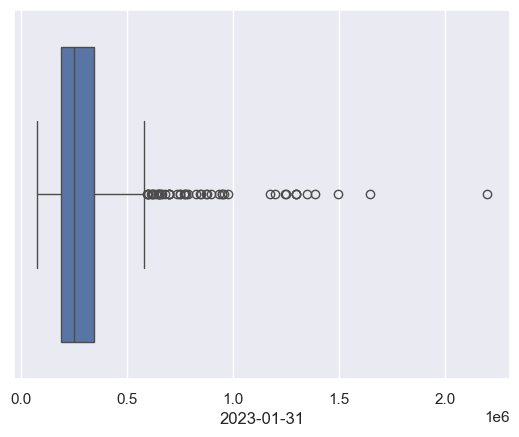

In [221]:
sns.boxplot(x=price_df['2023-01-31'])

<Axes: xlabel='2023-05-31'>

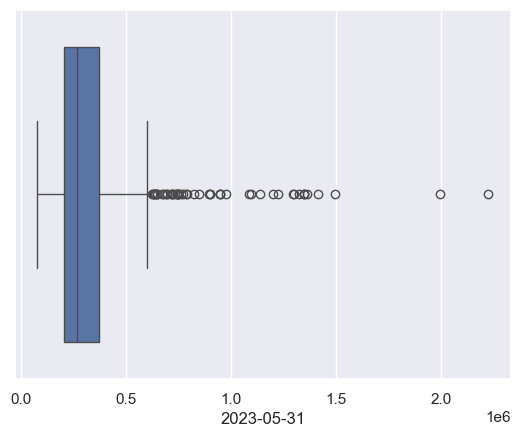

In [223]:
sns.boxplot(x=price_df['2023-05-31'])

<Axes: xlabel='2024-01-31'>

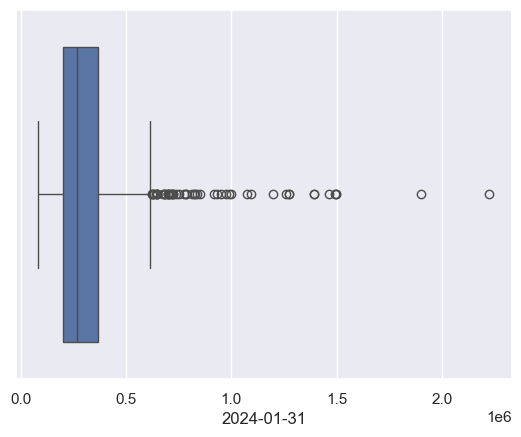

In [225]:
sns.boxplot(x=price_df['2024-01-31'])

<Axes: xlabel='2024-05-31'>

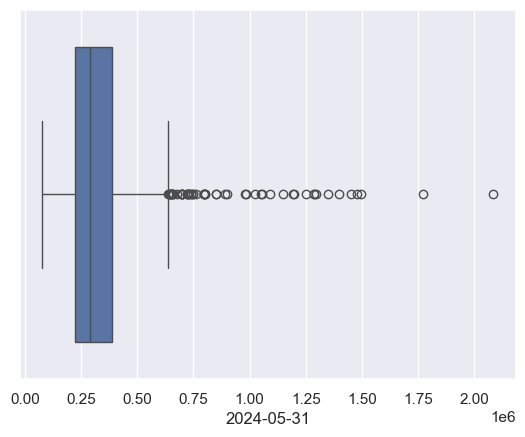

In [227]:
sns.boxplot(x=price_df['2024-05-31'])

In [229]:
price_date_columns = [col for col in price_df.columns if pd.to_datetime(col, errors='coerce', format='%Y-%m-%d', exact=True) is not pd.NaT]

price_date_df = price_df[price_date_columns]
Q1 = price_date_df.quantile(0.25)
Q3 = price_date_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

2023-01-31    158862.50
2023-02-28    162453.75
2023-03-31    159975.00
2023-04-30    169100.00
2023-05-31    166497.00
2023-06-30    160075.00
2023-07-31    164000.00
2023-08-31    160000.00
2023-09-30    165375.00
2023-10-31    164862.50
2023-11-30    172362.50
2023-12-31    168425.00
2024-01-31    166875.00
2024-02-29    161150.00
2024-03-31    166387.50
2024-04-30    165250.00
2024-05-31    165100.00
2024-06-30    170000.00
2024-07-31    164937.50
2024-08-31    163850.00
2024-09-30    160000.00
2024-10-31    156600.00
dtype: float64


### Looking at the charts again, there is definitely more variation around the median, but there are quite a few outliers still. My guess is these are from states where housing prices have really shot up. Like before, I'll keep the data as is as there are a lot of values considered outliers.

### Similar to above in the previous section, I'll need to grab the date columns.

In [233]:
drop_nov_dec = ['2023-11-30', '2023-12-31']
price_df = price_df.drop(columns=drop_nov_dec)

In [235]:
dates_2023 = [col for col in price_df.columns if col.startswith('2023')]
dates_2024 = [col for col in price_df.columns if col.startswith('2024')]

price_df['TotalListPrice_2023'] = price_df[dates_2023].sum(axis=1)
price_df['TotalListPrice_2024'] = price_df[dates_2024].sum(axis=1)

state_totals_2023 = price_df.groupby('State')['TotalListPrice_2023'].sum()
state_totals_2024 = price_df.groupby('State')['TotalListPrice_2024'].sum()

state_totals_comparison = pd.DataFrame({
    '2023 List Price': state_totals_2023,
    '2024 List Price': state_totals_2024
}).sort_values(by='2023 List Price', ascending=False)

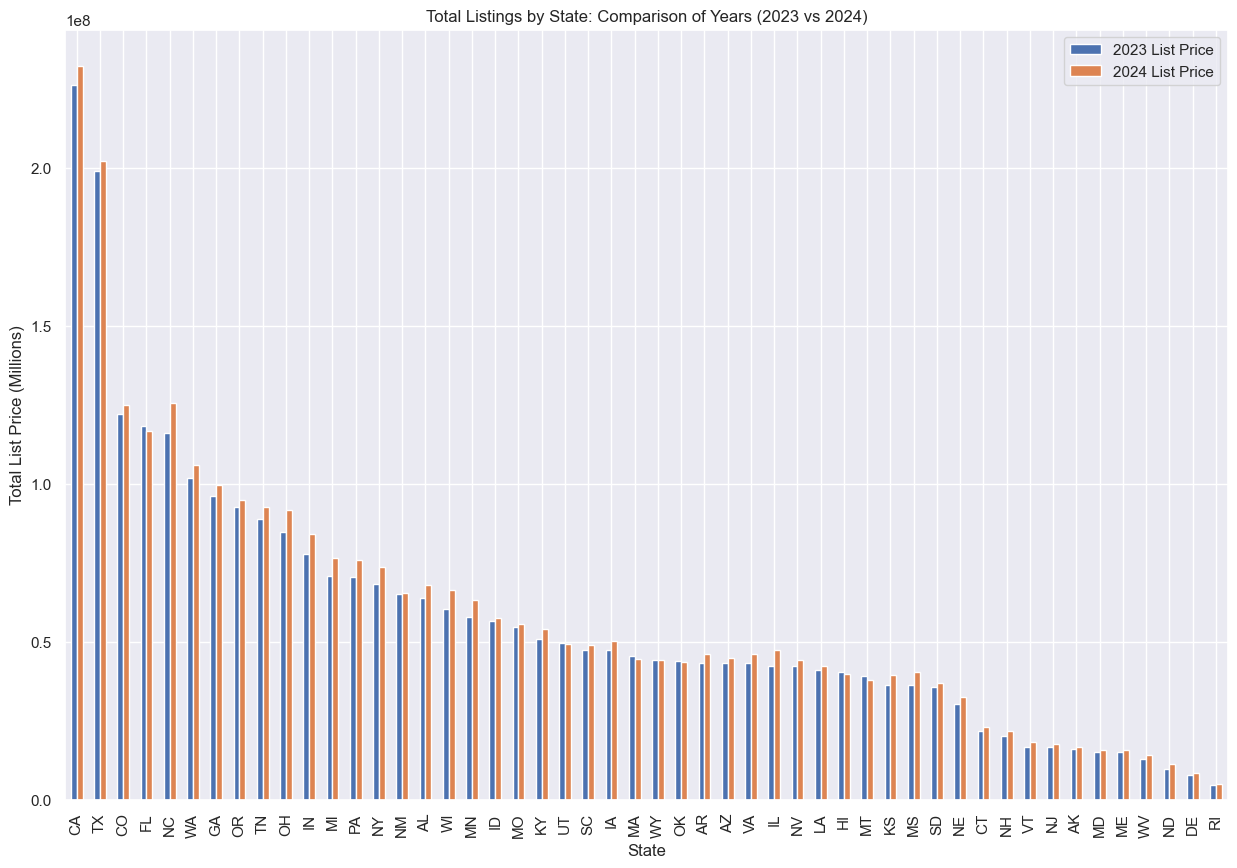

In [237]:
state_totals_comparison.plot(kind='bar', figsize=(15,10))
plt.title("Total Listings by State: Comparison of Years (2023 vs 2024)")
plt.xlabel('State')
plt.ylabel("Total List Price (Millions)")
plt.show()

### We can see that California and Texas have a huge amount homes listed for high prices when compared to the rest of the states. Those numbers still increased in 2024!

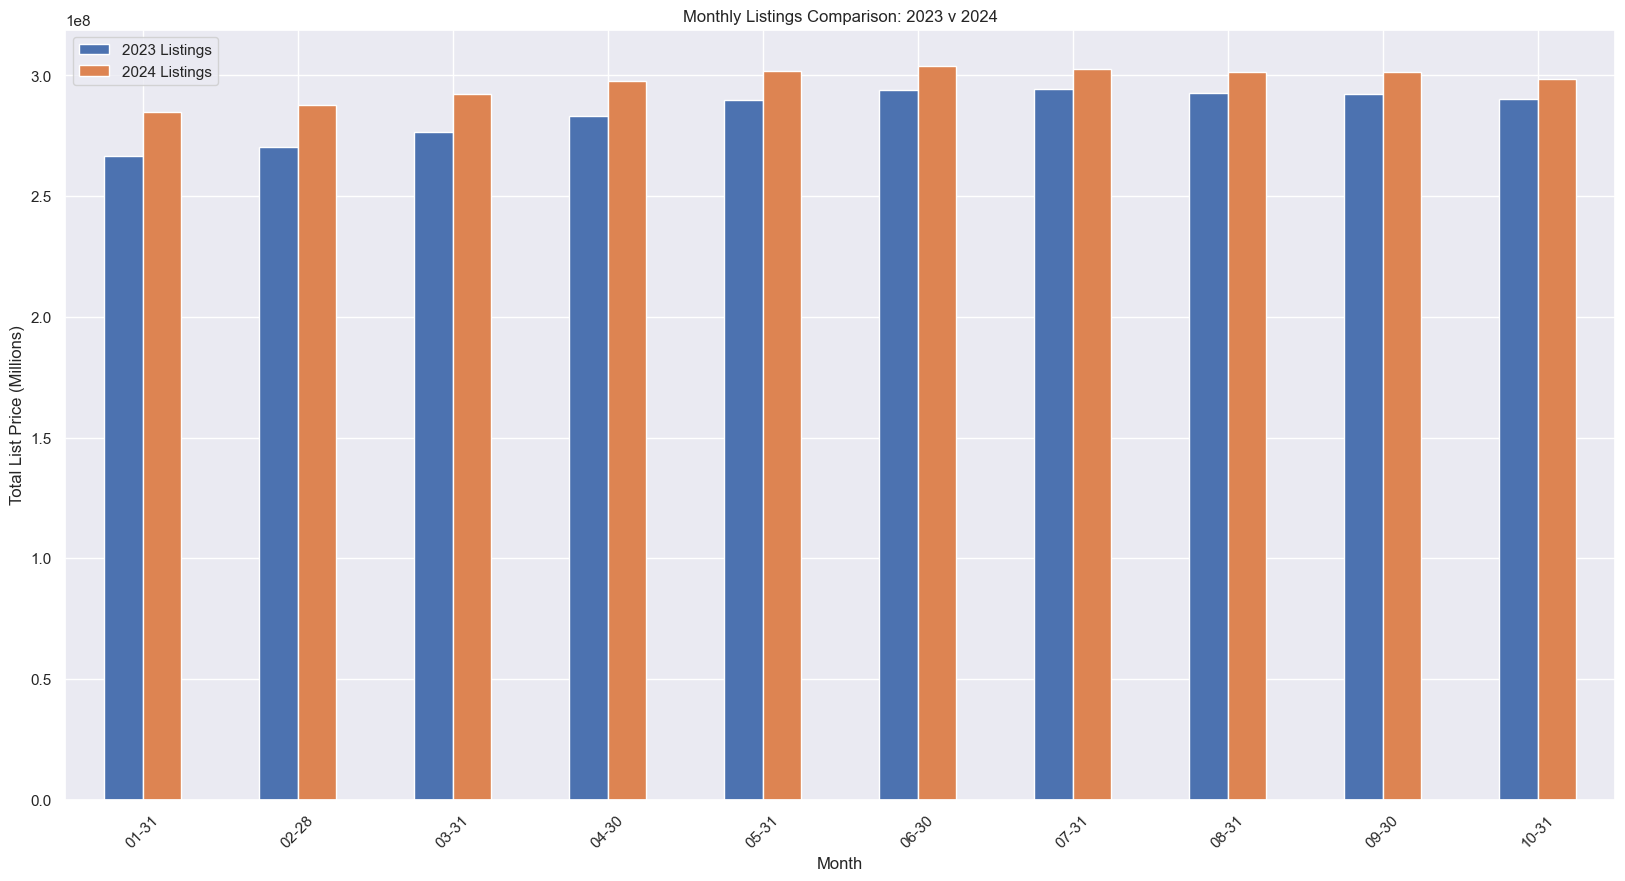

In [240]:
monthly_totals_2023 = price_df[dates_2023].sum()
monthly_totals_2024 = price_df[dates_2024].sum()

price_comparison_df = pd.DataFrame({
    'Month': monthly_totals_2023.index.str.slice(5),
    '2023 Listings': monthly_totals_2023.values,
    '2024 Listings': monthly_totals_2024.values,
})

price_comparison_df.plot(x='Month', kind='bar', figsize=(20,10))
plt.title("Monthly Listings Comparison: 2023 v 2024")
plt.xlabel("Month")
plt.ylabel("Total List Price (Millions)")
plt.xticks(rotation=45)
plt.show()

### Breaking it down by months here helped spread the prices but it is harder to see which month clearly had the most.

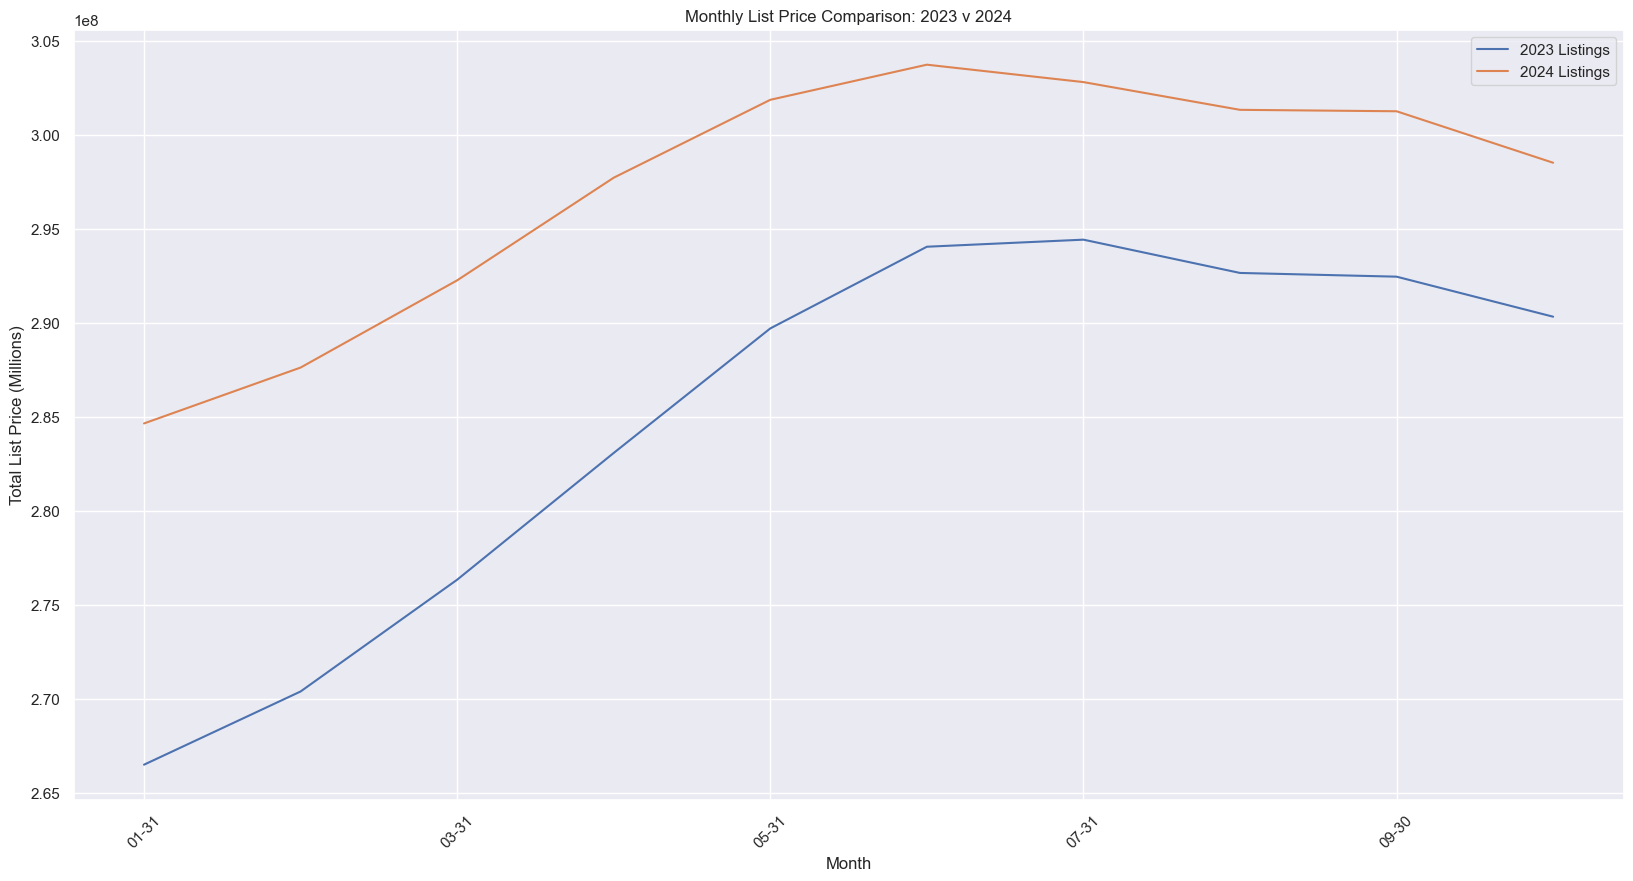

In [243]:
price_comparison_df.plot(x='Month', kind='line', figsize=(20,10))
plt.title("Monthly List Price Comparison: 2023 v 2024")
plt.xlabel("Month")
plt.ylabel("Total List Price (Millions)")
plt.xticks(rotation=45)
plt.show()

### A line graph does a better job of showing us what month was best in both years. For both years the highest prices were in the summer months of June and July. As in the listing graphs, these prices also start to go down as winter approaches. I would say that 2024 saw an increase in home prices for sure, but it is cooling down.

## Overall I would say that at this point in the year that listings and pricings are going down. With the coming winter months people will not be listing as many houses and those that are, will be lowering their prices to sell.
***

# 3) Should I wait to invest or should I invest now and if so then where should I invest. (You could recommend more than one place)? (**Matt Henning**)
---

## Should You Invest Now or Wait? Where Should You Invest?

In [252]:
# Load datasets
zhvi_data = pd.read_csv('./datasets/ZHVI_Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv')
zori_data = pd.read_csv('./datasets/ZORI_Metro_zordi_uc_sfr_month.csv')
market_temp_data = pd.read_csv('./datasets/MARKET_TEMP_Metro_market_temp_index_uc_sfrcondo_month.csv')
dttp_data = pd.read_csv('./datasets/DTTP_Metro_mean_doz_pending_uc_sfrcondo_month.csv')
inventory_data = pd.read_csv('./datasets/FOR_SALE_INVENTORY_Metro_invt_fs_uc_sfr_sm_month.csv')

# Display data to ensure it loaded
zhvi_data.head(), zori_data.head(), market_temp_data.head(), dttp_data.head(), inventory_data.head()
# Reshape datasets for 2023-2024
def reshape_and_filter(df, id_vars, value_name, start_year=2023, end_year=2024):
    df_long = df.melt(id_vars=id_vars, var_name="Date", value_name=value_name)
    df_long["Date"] = pd.to_datetime(df_long["Date"], errors="coerce")
    return df_long[
        (df_long["Date"].dt.year >= start_year) & (df_long["Date"].dt.year <= end_year)
    ]


In [254]:
# Extract the latest data for analysis, rename for zhvi and zori to clarify and tracking
zhvi_latest = zhvi_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'ZHVI_Latest'})
zori_latest = zori_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'ZORI_Latest'})
market_temp_latest = market_temp_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'MarketTemp_Latest'})

# Merge datasets, merging the zhvi and zori for region and state, makes it more clear and remove united states as a region
combined_data = pd.merge(zhvi_latest, zori_latest, on=['RegionName', 'StateName'], how='inner')
combined_data = pd.merge(combined_data, market_temp_latest, on=['RegionName', 'StateName'], how='inner')

# Rank markets by metrics, metrics being "hottest" by state/region 
combined_data['ZHVI_Rank'] = combined_data['ZHVI_Latest'].rank(ascending=False)
combined_data['ZORI_Rank'] = combined_data['ZORI_Latest'].rank(ascending=False)
combined_data['MarketTemp_Rank'] = combined_data['MarketTemp_Latest'].rank(ascending=False)

# Calculate overall rank
combined_data['Overall_Rank'] = combined_data[['ZHVI_Rank', 'ZORI_Rank', 'MarketTemp_Rank']].mean(axis=1)

# Top-performing markets
top_markets = combined_data.sort_values(by='Overall_Rank').head(10)
top_markets

,RegionName,StateName,ZHVI_Latest,ZORI_Latest,MarketTemp_Latest,ZHVI_Rank,ZORI_Rank,MarketTemp_Rank,Overall_Rank
35,"San Jose, CA",CA,1.702743e+06,101.0,77.0,1.0,68.5,7.0,25.500000
12,"San Francisco, CA",CA,1.227564e+06,83.0,60.0,6.0,105.0,60.5,57.166667
122,"Salinas, CA",CA,8.409708e+05,141.0,53.0,21.0,24.0,135.0,60.000000
128,"Manchester, NH",NH,5.162688e+05,89.0,68.0,69.0,91.0,21.5,60.500000
6,"Washington, DC",VA,5.962993e+05,78.0,66.0,44.0,117.5,28.0,63.166667
100,"Modesto, CA",CA,4.663186e+05,93.0,61.0,88.0,83.0,53.5,74.833333
26,"Sacramento, CA",CA,5.838314e+05,76.0,62.0,48.0,130.0,48.0,75.333333
57,"Worcester, MA",MA,4.647810e+05,85.0,65.0,89.0,101.0,36.0,75.333333
48,"Hartford, CT",CT,3.820292e+05,101.0,80.0,165.0,68.5,4.0,79.166667
83,"Springfield, MA",MA,3.568748e+05,124.0,68.0,194.0,36.5,21.5,84.000000


In [256]:
# Filter inventory_data and dttp_data for October 2023 to October 2024
def filter_by_date_range(df, start_date, end_date, id_vars, value_name):
    # Melt the dataset to reshape it
    df_long = df.melt(id_vars=id_vars, var_name="Date", value_name=value_name)
    # Convert the Date column to datetime explicitly specifying the format
    df_long["Date"] = pd.to_datetime(df_long["Date"], format="%Y-%m-%d", errors="coerce")
    # Filter by the date range
    return df_long[(df_long["Date"] >= start_date) & (df_long["Date"] <= end_date)]

# Define the date range
start_date = "2023-10-01"
end_date = "2024-10-31"

# Reshape and filter inventory_data
inventory_filtered = filter_by_date_range(
    inventory_data, start_date, end_date, id_vars=["RegionName", "StateName"], value_name="Inventory"
)

# Reshape and filter dttp_data
dttp_filtered = filter_by_date_range(
    dttp_data, start_date, end_date, id_vars=["RegionName", "StateName"], value_name="DaysOnMarket"
)

# Aggregate the filtered data to get the latest values (October 2024)
inventory_latest = inventory_filtered.groupby(["RegionName", "StateName"])["Inventory"].last().reset_index()
dttp_latest = dttp_filtered.groupby(["RegionName", "StateName"])["DaysOnMarket"].last().reset_index()

# Merge the filtered and aggregated data with top markets
investment_data = pd.merge(top_markets, inventory_latest, on=["RegionName", "StateName"], how="inner")
investment_data = pd.merge(investment_data, dttp_latest, on=["RegionName", "StateName"], how="inner")

print(investment_data)

          RegionName StateName   ZHVI_Latest  ZORI_Latest  MarketTemp_Latest  \
0       San Jose, CA        CA  1.702743e+06        101.0               77.0   
1  San Francisco, CA        CA  1.227564e+06         83.0               60.0   
2        Salinas, CA        CA  8.409708e+05        141.0               53.0   
3     Manchester, NH        NH  5.162688e+05         89.0               68.0   
4     Washington, DC        VA  5.962993e+05         78.0               66.0   
5        Modesto, CA        CA  4.663186e+05         93.0               61.0   
6     Sacramento, CA        CA  5.838314e+05         76.0               62.0   
7      Worcester, MA        MA  4.647810e+05         85.0               65.0   
8       Hartford, CT        CT  3.820292e+05        101.0               80.0   
9    Springfield, MA        MA  3.568748e+05        124.0               68.0   

   ZHVI_Rank  ZORI_Rank  MarketTemp_Rank  Overall_Rank Inventory DaysOnMarket  
0        1.0       68.5              7.

In [258]:
# Analyze inventory and days on market trends
inventory_latest = inventory_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'Inventory_Latest'})
dttp_latest = dttp_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'DaysOnMarket_Latest'})

# Merge with top markets data
investment_data = pd.merge(top_markets, inventory_latest, on=['RegionName', 'StateName'], how='inner')
investment_data = pd.merge(investment_data, dttp_latest, on=['RegionName', 'StateName'], how='inner')

# Display investment data
investment_data

,RegionName,StateName,ZHVI_Latest,ZORI_Latest,MarketTemp_Latest,ZHVI_Rank,ZORI_Rank,MarketTemp_Rank,Overall_Rank,Inventory_Latest,DaysOnMarket_Latest
0,"San Jose, CA",CA,1.702743e+06,101.0,77.0,1.0,68.5,7.0,25.500000,1933.0,28.0
1,"San Francisco, CA",CA,1.227564e+06,83.0,60.0,6.0,105.0,60.5,57.166667,6139.0,36.0
2,"Salinas, CA",CA,8.409708e+05,141.0,53.0,21.0,24.0,135.0,60.000000,599.0,43.0
3,"Manchester, NH",NH,5.162688e+05,89.0,68.0,69.0,91.0,21.5,60.500000,530.0,19.0
4,"Washington, DC",VA,5.962993e+05,78.0,66.0,44.0,117.5,28.0,63.166667,10456.0,29.0
5,"Modesto, CA",CA,4.663186e+05,93.0,61.0,88.0,83.0,53.5,74.833333,946.0,35.0
6,"Sacramento, CA",CA,5.838314e+05,76.0,62.0,48.0,130.0,48.0,75.333333,5598.0,38.0
7,"Worcester, MA",MA,4.647810e+05,85.0,65.0,89.0,101.0,36.0,75.333333,1672.0,26.0
8,"Hartford, CT",CT,3.820292e+05,101.0,80.0,165.0,68.5,4.0,79.166667,1833.0,20.0
9,"Springfield, MA",MA,3.568748e+05,124.0,68.0,194.0,36.5,21.5,84.000000,1132.0,25.0


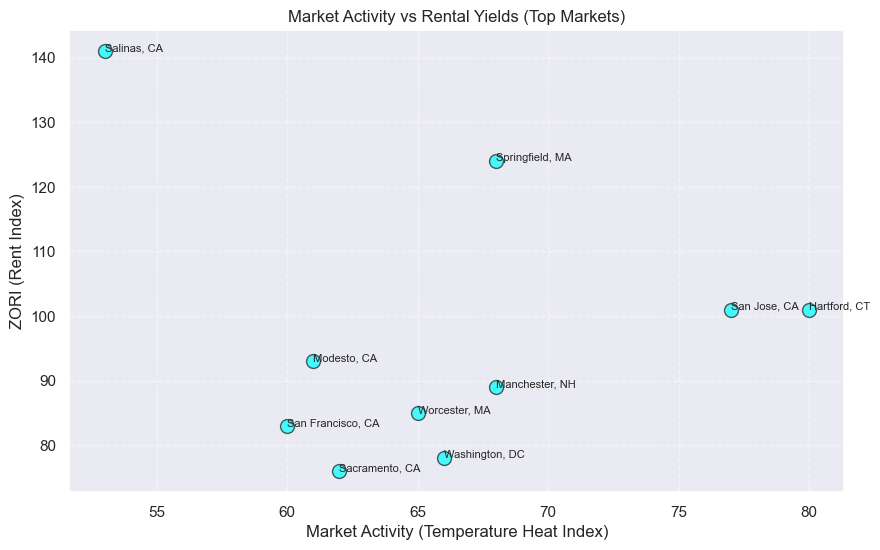

In [260]:
# Scatter plot: Market Activity vs Rental Yields
plt.figure(figsize=(10, 6))
plt.scatter(investment_data['MarketTemp_Latest'], investment_data['ZORI_Latest'], color='cyan', s=100, edgecolors='k', alpha=0.7)
for i, region in enumerate(investment_data['RegionName']):
    plt.text(investment_data['MarketTemp_Latest'].iloc[i], investment_data['ZORI_Latest'].iloc[i], region, fontsize=8)

plt.xlabel('Market Activity (Temperature Heat Index)')
plt.ylabel('ZORI (Rent Index)')
plt.title('Market Activity vs Rental Yields (Top Markets)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### **Market Activity vs Rental Yields**

This scatter plot illustrates the relationship between **Market Activity (Temperature Heat Index)** and **Rental Yields (ZORI)** in the top-performing real estate markets. It helps identify the type of opportunities each market offers based on competition and rental income potential.

- **High Rental Yields, Moderate Competition**:  
  Markets with strong rental yields but lower competition (low temperature index) could be undervalued gems. These areas may provide great opportunities for rental investments with less competition from other buyers. For example, if a market has high ZORI but relatively low Market Activity, it’s likely a lucrative market for rental income.

- **Highly Competitive Markets**:  
  In markets with high activity (high temperature index), such as **San Jose, CA**, rental yields might be lower, but these areas excel in price appreciation. Such markets are ideal for investors interested in flipping or selling upgraded properties quickly at a profit.

- **Key Takeaway**:  
  This plot helps investors balance their strategies:  
  - For rental income, focus on markets with high ZORI and moderate competition.  
  - For flipping and quick resale, target markets with high competition and appreciation potential.  
  Use this visualization to identify which markets align with your investment goals.


<Figure size 1000x800 with 0 Axes>

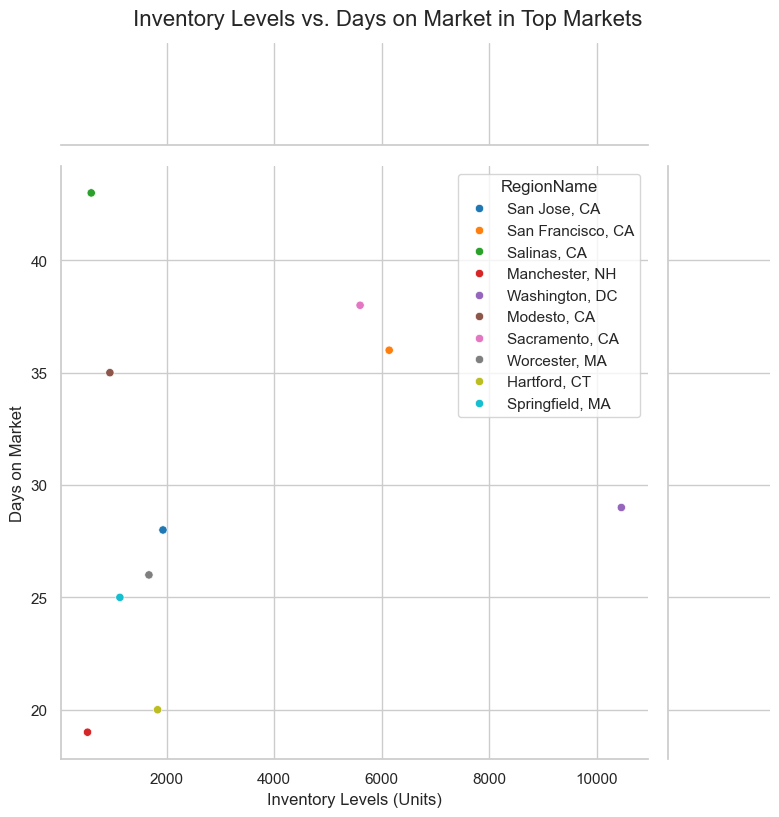

In [263]:
# joint plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.jointplot(
    data=investment_data,
    x="Inventory_Latest",
    y="DaysOnMarket_Latest",
    kind="scatter",
    hue="RegionName",
    palette="tab10",
    height=8,
    marginal_kws=dict(bins=20, fill=True),
)

plt.suptitle("Inventory Levels vs. Days on Market in Top Markets", y=1.02, fontsize=16)
plt.xlabel("Inventory Levels (Units)")
plt.ylabel("Days on Market")
plt.show()



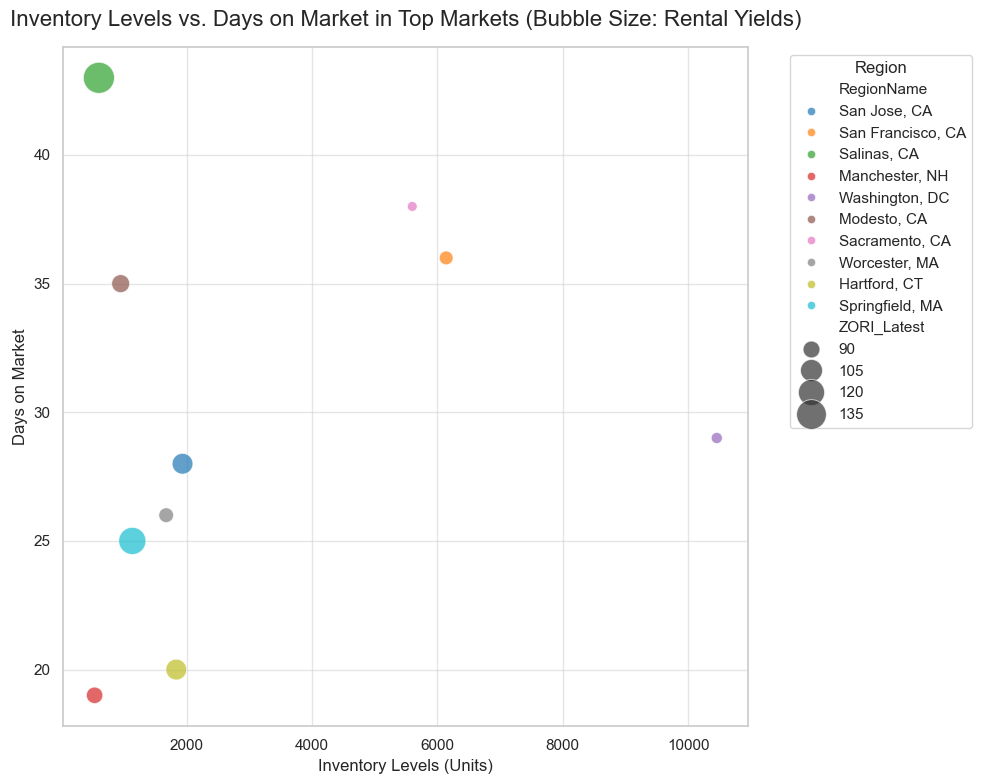

In [264]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Bubble graph
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Create a bubble graph
sns.scatterplot(
    data=investment_data,
    x="Inventory_Latest",
    y="DaysOnMarket_Latest",
    size="ZORI_Latest",  # Bubble size reflects rental yields (or choose another metric)
    hue="RegionName",  # Different colors for regions
    palette="tab10",  # Color palette for regions
    sizes=(50, 500),  # Adjust size range for bubbles
    alpha=0.7  # Transparency for better visibility
)

# Add titles and labels
plt.title("Inventory Levels vs. Days on Market in Top Markets (Bubble Size: Rental Yields)", fontsize=16, pad=15)
plt.xlabel("Inventory Levels (Units)", fontsize=12)
plt.ylabel("Days on Market", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Region")
plt.grid(alpha=0.5)

# Display the plot
plt.tight_layout()
plt.show()



### **Inventory Levels vs. Days on Market**

These visualizations explore the relationship between **Inventory Levels** and **Days on Market** in the top-performing real estate markets. 

  - **Scatter Plot**: Each point represents a market (region), showing how much inventory is available (x-axis) and how quickly homes are selling (y-axis).
  - **Hue for Region Names**: Each market is color-coded to help differentiate between the top-performing locations.
  - **Marginal Distributions**: Histograms along the axes show the distribution of inventory levels and days on market, revealing overall trends.
  -  **Bubble Chart**: This bubble chart explores the relationship between **Inventory Levels** (x-axis) and **Days on Market** (y-axis) in the top-performing real estate markets. It also incorporates:
- **Bubble Size**: Reflects rental yields (ZORI_Latest), with larger bubbles representing higher rental profitability.
- **Hue for Region Names**: Each region is color-coded, allowing easy differentiation between markets.


- **Key Insights**:
  1. **Low Inventory, Low Days on Market**:  
     Markets with low inventory and quick sales (e.g., low days on market) are highly competitive, making them ideal for flipping or quick resale. These markets indicate high buyer demand and fast-moving properties.
  2. **High Inventory, High Days on Market**:  
     Markets with higher inventory and longer days on market may offer opportunities for investors to negotiate better deals. These areas are more suited for rental investments, where securing a property at a lower cost may yield higher returns over time.
  3. **Balanced Markets**:  
     Some markets show moderate inventory levels and days on market, striking a balance between availability and demand. These markets can be a good choice for both flipping and long-term investments.

- **Why I care**:  
  This visualization helps you identify markets that align with your goals:
  - For **quick resale**: Look for markets with low inventory and days on market.  
  - For **long-term rental investments**: Focus on markets with higher inventory, as they may provide more favorable purchase conditions.

Th scatter plot and bubble chart show how competitive a market is.


In [268]:
print(investment_data.columns)


Index(['RegionName', 'StateName', 'ZHVI_Latest', 'ZORI_Latest',
       'MarketTemp_Latest', 'ZHVI_Rank', 'ZORI_Rank', 'MarketTemp_Rank',
       'Overall_Rank', 'Inventory_Latest', 'DaysOnMarket_Latest'],
      dtype='object')


In [270]:
# Rename columns for heatmp
investment_data = investment_data.rename(columns={
    "inventory_latest": "Inventory",
    "days_on_market_latest": "DaysOnMarket"
})

In [272]:
# Merge inventory and days on market data with top markets
investment_data = pd.merge(
    top_markets,
    inventory_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'Inventory'}),
    on=['RegionName', 'StateName'],
    how='inner'
)
investment_data = pd.merge(
    investment_data,
    dttp_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'DaysOnMarket'}),
    on=['RegionName', 'StateName'],
    how='inner'
)

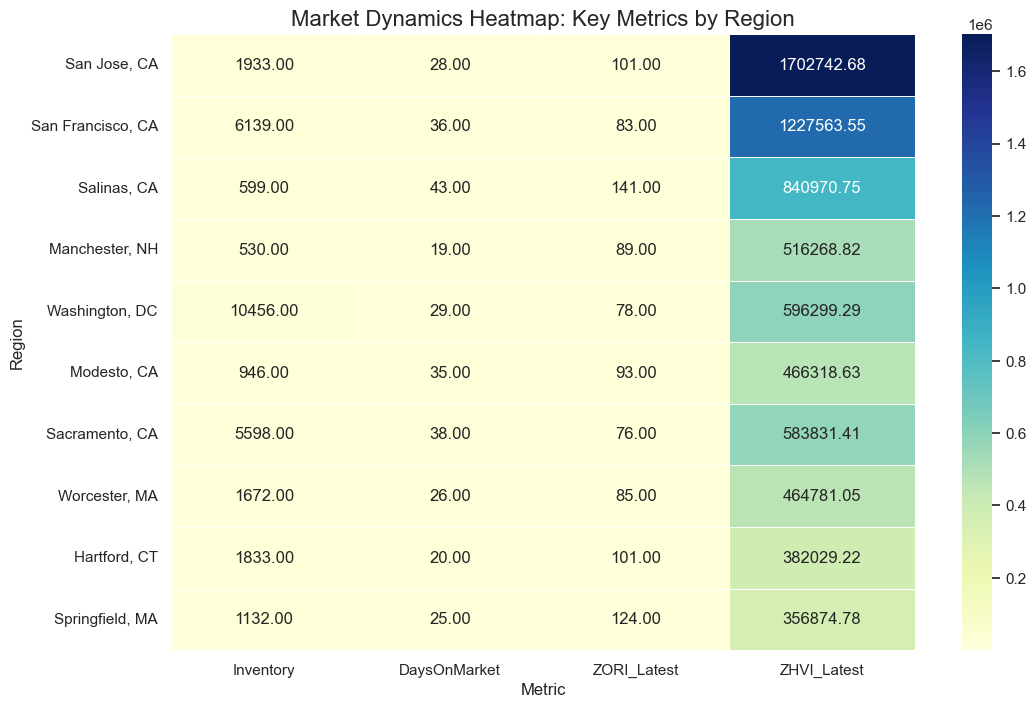

In [274]:
# Prepare data for the heatmap
heatmap_data = investment_data.set_index("RegionName")[["Inventory", "DaysOnMarket", "ZORI_Latest", "ZHVI_Latest"]]


# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Market Dynamics Heatmap: Key Metrics by Region", fontsize=16)
plt.ylabel("Region", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.show()



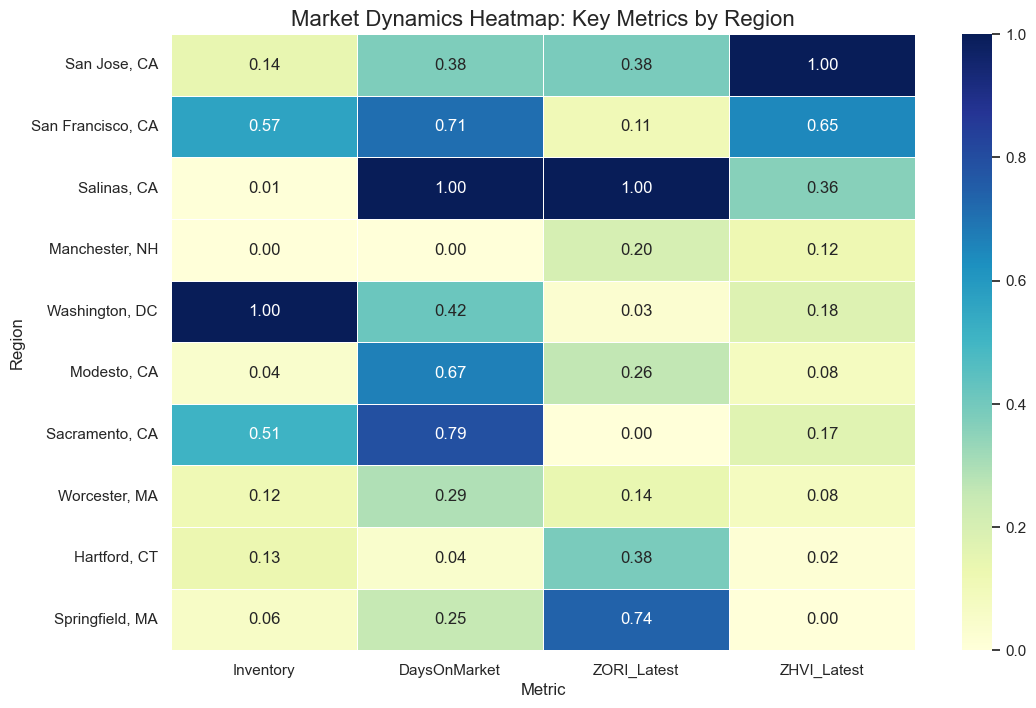

In [275]:
# exact same as before but with each metric normalized, easier on the eyes
heatmap_data = investment_data.set_index("RegionName")[["Inventory", "DaysOnMarket", "ZORI_Latest", "ZHVI_Latest"]]
#added after too much trial and error to "normalize the data"
heatmap_data = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Market Dynamics Heatmap: Key Metrics by Region", fontsize=16)
plt.ylabel("Region", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.show()



## **Market Dynamics Heatmap: Key Metrics by Region**

This heatmap provides a side-by-side comparison of the four metrics provided by Zillow metrics across several regions. Each metric is normalized (scaled between 0 and 1) to make comparisons across different scales possible. Darker shades indicate higher values, while lighter shades indicate lower values.

---

### **Zillow Metrics Explained**
1. **Inventory**:
   - Measures the number of homes available for sale in the region.
   - **Darker cells** (higher values): Indicate regions with more inventory, suggesting a buyer's market with less competition.
   - **Lighter cells** (lower values): Indicate tighter inventory, signaling a seller's market.

2. **Days on Market (DOM)**:
   - Tracks how quickly properties are selling in the region.
   - **Darker cells** (higher values): Indicate properties take longer to sell, possibly due to lower demand or higher pricing.
   - **Lighter cells** (lower values): Indicate "hot" markets with high buyer demand and quick sales.

3. **ZORI_Latest**:
   - Reflects the rental yields (Zillow Observed Rent Index) in the region.
   - **Darker cells** (higher values): Indicate stronger rental demand and higher profitability for landlords.
   - **Lighter cells** (lower values): Suggest lower rental profitability.

4. **ZHVI_Latest**:
   - Represents home value appreciation (Zillow Home Value Index).
   - **Darker cells** (higher values): Indicate regions with strong price growth and high property values.
   - **Lighter cells** (lower values): Suggest lower appreciation potential.

---

### **Key Insights**
1. **San Jose, CA**:
   - **Low Inventory** (0.14) but **High ZHVI_Latest** (1.00): Indicates a highly competitive market with strong home value growth, ideal for *immediate* appreciation-focused investments.

2. **Salinas, CA**:
   - **Extremely Low Inventory** (0.01) and **High ZORI_Latest** (1.00): Suggests a tight rental market with high profitability for landlords.

3. **Manchester, NH**:
   - **Very Low Inventory** (0.00) and **Moderate Rental Yields** (0.20): Indicates strong demand but lower rental profitability compared to other markets.

4. **Washington, DC**:
   - **High Inventory** (1.00) but **Low Rental Yields** (0.03): Suggests a cooling market with opportunities for negotiation but less attractive for rental income.

5. **Springfield, MA**:
   - **Moderate Inventory** (0.06) and **High ZORI_Latest** (0.74): A balanced market offering strong rental yields and moderate competition.

---

### **How to Use This Heatmap**
- **For Flipping**:
  - Focus on regions with **low inventory** and **high ZHVI_Latest**, such as *San Jose, CA* and *Salinas, CA*.
- **For Rental Income**:
  - Target regions with **high ZORI_Latest**, like *Salinas, CA* or *Springfield, MA*, for strong rental profitability.
- **Bonus Opportunities**:
  - Check out regions with **high inventory** and **long days on market**, like *Washington, DC*, where buyers have leverage.



### **Conclusion on Q3 -- Should You Invest Now or Wait? Where Should You Invest?**

Given the current market trends, **now is a favorable time to invest** in real estate. Many markets demonstrate strong price growth and competitive activity, suggesting demand remains high. 

- **Invest Now If**: You aim to capitalize on current market dynamics, particularly in competitive regions with strong price appreciation like **San Jose, CA**. Quick resale opportunities are better in these high-demand markets.
- **Recommended Markets**:
  - For rental income: *Salinas, CA* and *Springfield, MA*, with strong rental yields and moderate competition.
  - For flipping: *San Francisco, CA* and *San Jose, CA*, where price appreciation remains robust, and demand is strong.

Investing now in the above chosen markets to yield significant returns.

# 4) How long some of the real-estate stays on the market before they rent or sell?(**Tracy Mengyuan Cui**)
---

1. Importing the required libraries for EDA

In [2]:
# %pip install pandas
# %pip install numpy
# %pip install seaborn
%pip install geopandas contextily

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import geopandas as gpd

2. Loading the data into the data frame

In [286]:
import os
os.getcwd()

'C:\\Users\\webhe\\OneDrive\\Desktop\\St.Thomas Courses\\Data Preparation\\final-group-project-seis-631'

Days to Pending: How long it takes homes in a region to change to pending status on Zillow.com after first being shown as for sale. The reported figure indicates the number of days (mean or median) that it took for homes that went pending during the week being reported, to go pending. This differs from the old “Days on Zillow” metric in that it excludes the in-contract period before a home sells.

In [5]:
# Mean days of pending (monthly)
df1 = pd.read_csv("./datasets/Metro_mean_doz_pending_uc_sfrcondo_sm_month.csv")
# To display the top 5 rows 
df1.head(5)   

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,0,United States,country,NaN,51.0,48.0,45.0,43.0,44.0,...,49.0,52.0,49.0,43.0,39.0,37.0,38.0,41.0,44.0,46.0
1,394913,1,"New York, NY",msa,NY,68.0,65.0,63.0,64.0,66.0,...,68.0,71.0,67.0,58.0,51.0,49.0,49.0,52.0,55.0,58.0
2,753899,2,"Los Angeles, CA",msa,CA,35.0,32.0,31.0,32.0,33.0,...,40.0,41.0,37.0,33.0,30.0,29.0,30.0,33.0,36.0,38.0
3,394463,3,"Chicago, IL",msa,IL,51.0,44.0,40.0,39.0,40.0,...,42.0,43.0,38.0,31.0,26.0,24.0,24.0,25.0,28.0,31.0
4,394514,4,"Dallas, TX",msa,TX,46.0,42.0,38.0,37.0,38.0,...,51.0,52.0,49.0,43.0,39.0,38.0,40.0,45.0,50.0,54.0


In [6]:
# Median days of pending
df2 = pd.read_csv("./datasets/Metro_med_doz_pending_uc_sfrcondo_sm_month.csv")
# To display the top 5 rows 
df2.head(5)   

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,0,United States,country,NaN,31.0,21.0,19.0,18.0,20.0,...,27.0,25.0,20.0,14.0,13.0,14.0,15.0,18.0,20.0,21.0
1,394913,1,"New York, NY",msa,NY,58.0,43.0,38.0,40.0,43.0,...,37.0,36.0,30.0,23.0,21.0,22.0,24.0,26.0,28.0,28.0
2,753899,2,"Los Angeles, CA",msa,CA,17.0,14.0,15.0,15.0,17.0,...,19.0,18.0,15.0,13.0,13.0,14.0,15.0,16.0,18.0,20.0
3,394463,3,"Chicago, IL",msa,IL,32.0,17.0,15.0,16.0,18.0,...,18.0,17.0,12.0,7.0,7.0,7.0,8.0,9.0,11.0,13.0
4,394514,4,"Dallas, TX",msa,TX,27.0,21.0,20.0,20.0,22.0,...,32.0,29.0,23.0,16.0,15.0,17.0,20.0,25.0,30.0,33.0


Days to Close (mean/median): Number of days between the listing going pending and the sale date.

In [7]:
# Mean days to close
df3 = pd.read_csv("./datasets/Metro_mean_days_to_close_uc_sfrcondo_sm_month.csv")
# To display the top 5 rows 
df3.head(5)   

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
0,102001,0,United States,country,NaN,35.0,34.0,34.0,35.0,36.0,...,33.0,34.0,34.0,33.0,32.0,33.0,34.0,34.0,34.0,34.0
1,394913,1,"New York, NY",msa,NY,57.0,53.0,50.0,51.0,53.0,...,53.0,54.0,55.0,54.0,52.0,51.0,53.0,54.0,55.0,55.0
2,753899,2,"Los Angeles, CA",msa,CA,34.0,32.0,33.0,33.0,34.0,...,30.0,31.0,30.0,30.0,29.0,29.0,29.0,29.0,29.0,30.0
3,394463,3,"Chicago, IL",msa,IL,43.0,42.0,42.0,44.0,45.0,...,37.0,38.0,37.0,37.0,36.0,37.0,38.0,38.0,38.0,37.0
4,394514,4,"Dallas, TX",msa,TX,21.0,21.0,21.0,22.0,22.0,...,28.0,28.0,28.0,28.0,28.0,28.0,29.0,29.0,29.0,28.0


In [8]:
# Median days to close
df4 = pd.read_csv("./datasets/Metro_median_days_to_close_uc_sfrcondo_sm_month.csv")
# To display the top 5 rows 
df4.head(5) 

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
0,102001,0,United States,country,NaN,32.0,31.0,32.0,33.0,34.0,...,30.0,31.0,30.0,30.0,30.0,30.0,31.0,31.0,31.0,31.0
1,394913,1,"New York, NY",msa,NY,55.0,51.0,48.0,49.0,52.0,...,50.0,51.0,52.0,51.0,48.0,48.0,50.0,52.0,52.0,52.0
2,753899,2,"Los Angeles, CA",msa,CA,31.0,30.0,30.0,31.0,31.0,...,28.0,28.0,28.0,28.0,27.0,28.0,28.0,28.0,28.0,28.0
3,394463,3,"Chicago, IL",msa,IL,40.0,40.0,41.0,42.0,43.0,...,34.0,35.0,34.0,34.0,33.0,34.0,35.0,35.0,34.0,34.0
4,394514,4,"Dallas, TX",msa,TX,20.0,20.0,20.0,21.0,21.0,...,27.0,28.0,27.0,27.0,27.0,28.0,28.0,28.0,28.0,28.0


In [9]:
df1.count()

RegionID      726
SizeRank      726
RegionName    726
RegionType    726
StateName     725
             ... 
2024-06-30    678
2024-07-31    681
2024-08-31    688
2024-09-30    693
2024-10-31    726
Length: 85, dtype: int64

In [10]:
df3.count()

RegionID      623
SizeRank      623
RegionName    623
RegionType    623
StateName     622
             ... 
2024-05-31    600
2024-06-30    606
2024-07-31    610
2024-08-31    619
2024-09-30    623
Length: 84, dtype: int64

How long some of the real-estate stays on the market before they rent or sell? The real-estate stays on the market means Days to Pending plus Days to Close.

Mean days on Market

In [11]:
non_numeric_columns = ['RegionID', 'RegionName', 'RegionType', 'StateName','SizeRank']

# Keep non-numerical columns
df_result = df1[non_numeric_columns].copy()

# Add numerical columns
df_sum = df1.drop(columns=non_numeric_columns).add(df3.drop(columns=non_numeric_columns), fill_value=0)

# Combine back
df_result = pd.concat([df_result, df_sum], axis=1)

In [12]:
df_result.head(5)

,RegionID,RegionName,RegionType,StateName,SizeRank,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,United States,country,NaN,0,86.0,82.0,79.0,78.0,80.0,...,83.0,86.0,82.0,75.0,72.0,71.0,72.0,75.0,78.0,46.0
1,394913,"New York, NY",msa,NY,1,125.0,118.0,113.0,115.0,119.0,...,122.0,126.0,121.0,110.0,102.0,102.0,103.0,107.0,110.0,58.0
2,753899,"Los Angeles, CA",msa,CA,2,69.0,64.0,64.0,65.0,67.0,...,71.0,71.0,67.0,62.0,59.0,58.0,59.0,62.0,66.0,38.0
3,394463,"Chicago, IL",msa,IL,3,94.0,86.0,82.0,83.0,85.0,...,80.0,80.0,75.0,67.0,63.0,62.0,62.0,63.0,65.0,31.0
4,394514,"Dallas, TX",msa,TX,4,67.0,63.0,59.0,59.0,60.0,...,79.0,80.0,77.0,71.0,67.0,67.0,69.0,74.0,78.0,54.0


In [13]:
# Filter data for United States
US_mean_data = df_result[df_result['RegionName'] == 'United States']

# Drop non-numeric columns to focus on numerical data
US_mean_numeric_data = US_mean_data.drop(columns=['RegionID', 'RegionName', 'RegionType', 'StateName', 'SizeRank'])

In [14]:
US_mean_data

,RegionID,RegionName,RegionType,StateName,SizeRank,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,United States,country,NaN,0,86.0,82.0,79.0,78.0,80.0,...,83.0,86.0,82.0,75.0,72.0,71.0,72.0,75.0,78.0,46.0


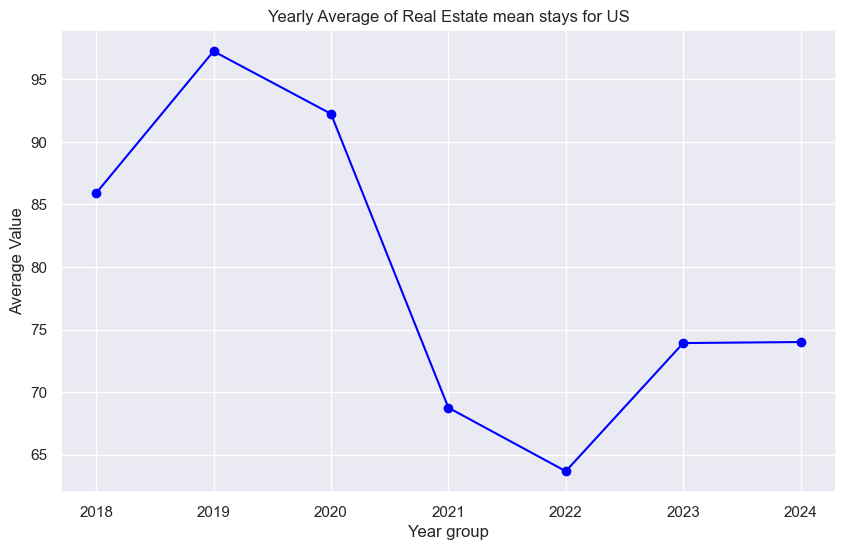

In [15]:
US_mean_numeric_data  = US_mean_numeric_data.T  # Transpose for easier handling
US_mean_numeric_data .index = pd.to_datetime(US_mean_numeric_data .index)
US_mean_numeric_data ['Year group'] = US_mean_numeric_data .index.year

# Group by year and calculate the average
yearly_data = US_mean_numeric_data .groupby('Year group').mean()

# Plot yearly data
plt.figure(figsize=(10, 6))
plt.plot(yearly_data.index, yearly_data.values, marker='o', linestyle='-', color='blue')
plt.title("Yearly Average of Real Estate mean stays for US")
plt.xlabel("Year group")
plt.ylabel("Average Value")
plt.grid(True)
plt.show()

Median days on Market

In [16]:
non_numeric_columns = ['RegionID', 'RegionName', 'RegionType', 'StateName','SizeRank']

# Keep non-numerical columns
df_median_result = df2[non_numeric_columns].copy()

# Add numerical columns
df_median_sum = df2.drop(columns=non_numeric_columns).add(df4.drop(columns=non_numeric_columns), fill_value=0)

# Combine back
df_median_result = pd.concat([df_median_result, df_median_sum], axis=1)

In [17]:
df_median_result.head(5)

,RegionID,RegionName,RegionType,StateName,SizeRank,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,United States,country,NaN,0,63.0,52.0,51.0,51.0,54.0,...,58.0,55.0,50.0,44.0,43.0,45.0,46.0,49.0,51.0,21.0
1,394913,"New York, NY",msa,NY,1,113.0,94.0,86.0,89.0,95.0,...,88.0,88.0,81.0,71.0,69.0,72.0,76.0,78.0,80.0,28.0
2,753899,"Los Angeles, CA",msa,CA,2,48.0,44.0,45.0,46.0,48.0,...,47.0,46.0,43.0,40.0,41.0,42.0,43.0,44.0,46.0,20.0
3,394463,"Chicago, IL",msa,IL,3,72.0,57.0,56.0,58.0,61.0,...,53.0,51.0,46.0,40.0,41.0,42.0,43.0,43.0,45.0,13.0
4,394514,"Dallas, TX",msa,TX,4,47.0,41.0,40.0,41.0,43.0,...,60.0,56.0,50.0,43.0,43.0,45.0,48.0,53.0,58.0,33.0


In [18]:
# Filter data for United States
US_median_data = df_median_result[df_median_result['RegionName'] == 'United States']

# Drop non-numeric columns to focus on numerical data
US_median_numeric_data = US_median_data.drop(columns=['RegionID', 'RegionName', 'RegionType', 'StateName', 'SizeRank'])

In [19]:
US_median_data

,RegionID,RegionName,RegionType,StateName,SizeRank,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,United States,country,NaN,0,63.0,52.0,51.0,51.0,54.0,...,58.0,55.0,50.0,44.0,43.0,45.0,46.0,49.0,51.0,21.0


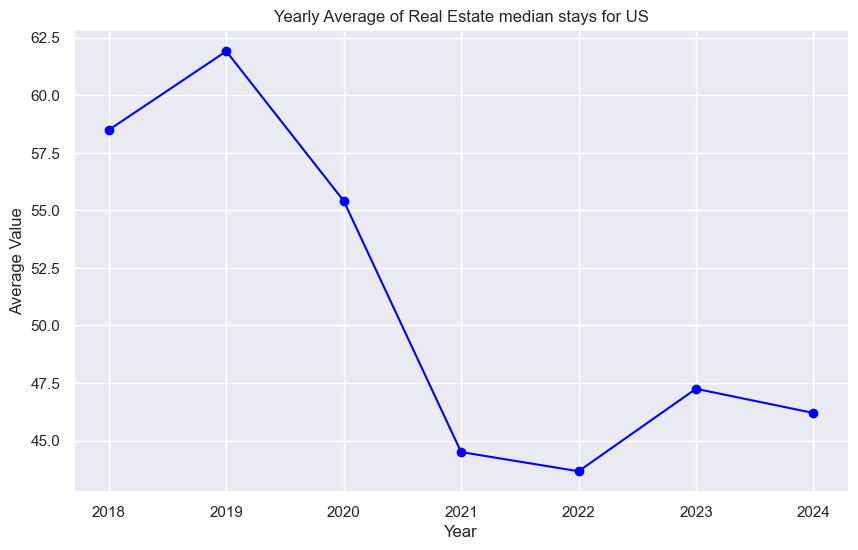

In [20]:
US_median_numeric_data = US_median_numeric_data.T  # Transpose for easier handling
US_median_numeric_data.index = pd.to_datetime(US_median_numeric_data.index)
US_median_numeric_data['Year'] = US_median_numeric_data.index.year

# Group by year and calculate the average
yearly_median_data = US_median_numeric_data.groupby('Year').mean()

# Plot yearly data
plt.figure(figsize=(10, 6))
plt.plot(yearly_median_data.index, yearly_median_data.values, marker='o', linestyle='-', color='blue')
plt.title("Yearly Average of Real Estate median stays for US")
plt.xlabel("Year")
plt.ylabel("Average Value")
plt.grid(True)
plt.show()

Heatmap of map of US of mean days in 2024-10-31

In [22]:
import geopandas as gpd

# Load the CSV file
file_path = "./datasets/Metro_mean_days_to_close_uc_sfrcondo_sm_month.csv"  # Update the path if needed
data = pd.read_csv(file_path)
print(set(data["RegionName"]))

# # Exclude 'United States' row
# filtered_data = data[data['RegionName'] != 'United States']


# # Aggregating the yearly average if 'Year' is added
# numeric_data = filtered_data.set_index('RegionName').iloc[:, 5:]
# numeric_data = numeric_data.T  # Transpose for easier handling
# numeric_data.index = pd.to_datetime(numeric_data.index)
# numeric_data['Year'] = numeric_data.index.year
# yearly_data = numeric_data.groupby('Year').mean().T.reset_index()

# # Load city boundary shapefile (update the path)
# cities = gpd.read_file("geo/ne_110m_populated_places.shp")  # Update the path
# cities.rename(columns={'NAME': 'StateName'}, inplace=True)  # Adjust based on actual column names
# print(cities.head())

# # Merge city data with geographical boundaries
# merged = cities.merge(yearly_data, on='StateName', how='left')
# merged.head()

# # Plot the data on a U.S. map
# fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# merged.plot(column='2023',  # Replace with the desired year column
#             cmap='coolwarm',
#             legend=True,
#             legend_kwds={'label': 'Mean Days to Close'},
#             ax=ax,
#             edgecolor='black')

# ax.set_title('Mean Days to Close by City (2023)')
# plt.show()


{'Torrington, CT', 'Bennington, VT', 'Blacksburg, VA', 'Paragould, AR', 'North Platte, NE', 'Kankakee, IL', 'Greenwood, SC', 'New Castle, IN', 'Branson, MO', 'Stillwater, OK', 'Grand Junction, CO', 'London, KY', 'Grand Forks, ND', 'San Francisco, CA', 'Big Rapids, MI', 'Newport, OR', 'Pittsburg, KS', 'Hannibal, MO', 'Ames, IA', 'Tullahoma, TN', 'Searcy, AR', 'Farmington, NM', 'Corning, NY', 'Bellefontaine, OH', 'Kahului, HI', 'Prescott Valley, AZ', 'Chillicothe, OH', 'Norwalk, OH', 'Salina, KS', 'Roseburg, OR', 'Madisonville, KY', 'Huntington, IN', 'Scranton, PA', 'Sterling, IL', 'Williston, ND', 'Rochester, NY', 'Midland, MI', 'Erie, PA', 'Knoxville, TN', 'College Station, TX', 'Morgantown, WV', 'Memphis, TN', 'Point Pleasant, WV', 'Fort Wayne, IN', 'Boulder, CO', 'Albany, GA', 'Myrtle Beach, SC', 'Sebring, FL', 'Angola, IN', 'Provo, UT', 'Granbury, TX', 'Dover, DE', 'Austin, MN', 'Kennewick, WA', 'Corpus Christi, TX', 'LaGrange, GA', 'Jackson, MS', 'Anniston, AL', 'Abilene, TX', 'Mou

In [23]:
# !pip install cartopy
# !pip install tqdm
# !pip install openpyxl

In [24]:
import os
os.getcwd()

'/Users/tracycui/final-group-project-seis-631'

/Users/tracycui/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


          City State  Value
1     New York    NY   55.0
2  Los Angeles    CA   30.0
3      Chicago    IL   37.0
4       Dallas    TX   28.0
5      Houston    TX   30.0


Geocoding: 100%|██████████████████████████████| 622/622 [05:42<00:00,  1.81it/s]


Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


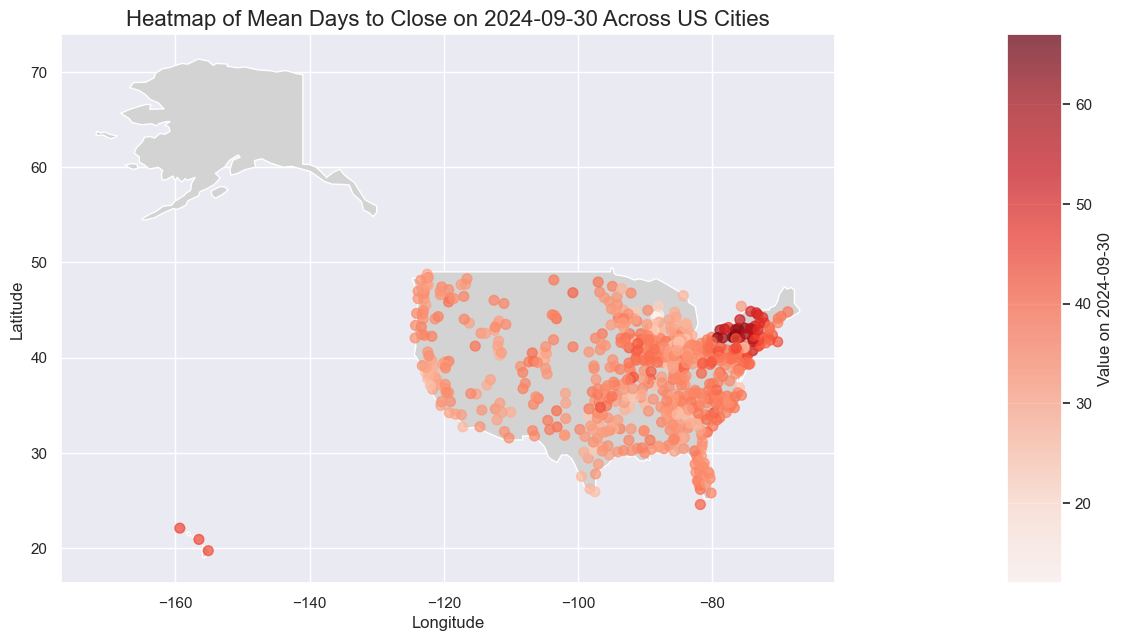

In [25]:
from tqdm import tqdm
from geopy.geocoders import Nominatim
import geopandas as gpd
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable


file_path = './datasets/Metro_mean_days_to_close_uc_sfrcondo_sm_month.csv'  # Update the path if needed
data = pd.read_csv(file_path)[1:]
# print(data.head())
data['City'] = data['RegionName'].apply(lambda x:x.split(",")[0])
# print(data.head())
data = data[["City","StateName","2024-09-30"]]
data.rename(columns={"StateName": "State", "2024-09-30": "Value"}, inplace=True)
print(data.head())


data['Latitude'] = None
data['Longitude'] = None


geolocator = Nominatim(user_agent="geoapi")


for idx, row in tqdm(data.iterrows(), total=data.shape[0], desc="Geocoding"):
    location = geolocator.geocode(f"{row['City']}, {row['State']}", timeout=10)
    if location:
        data.at[idx, 'Latitude'] = location.latitude
        data.at[idx, 'Longitude'] = location.longitude


data = data.dropna(subset=['Latitude', 'Longitude'])


shapefile_path = './datasets/110m_cultural/ne_110m_admin_0_countries.shp'


usa = gpd.read_file(shapefile_path)
print(usa.columns)

# usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa = usa[usa['ADMIN'] == 'United States of America']


gdf = gpd.GeoDataFrame(
    data, 
    geometry=gpd.points_from_xy(data['Longitude'], data['Latitude']),
    crs="EPSG:4326"
)


fig, ax = plt.subplots(1, 1, figsize=(15, 10))
usa.plot(ax=ax, color='lightgrey')


norm = Normalize(vmin=data['Value'].min(), vmax=data['Value'].max())
scatter = ax.scatter(
    data['Longitude'], 
    data['Latitude'], 
    c=data['Value'], 
    cmap='Reds', 
    norm=norm, 
    s=50, 
    alpha=0.7
)


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(scatter, cax=cax)
cbar.set_label('Value on 2024-09-30', fontsize=12)


ax.set_title('Heatmap of Mean Days to Close on 2024-09-30 Across US Cities', fontsize=16)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


# 5) How much average profit I could expect from my investments in terms of sale (% dollars) after paying mortgage. Calculate my ~ROI. (**David Braun**)
---

In [293]:
zhvi_df = pd.read_csv('./datasets/Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv')  # Replace with actual path or input
zhvf_df = pd.read_csv('./datasets/Metro_zhvf_growth_uc_sfrcondo_tier_0.33_0.67_month.csv')  # Replace with actual path or input

In [295]:
# Ensure RegionID exists and matches in both dataframes
if 'RegionID' not in zhvi_df.columns or 'RegionID' not in zhvf_df.columns:
    raise KeyError("Both DataFrames must contain 'RegionID' for merging.")

# Merge dataframes
merged_df = zhvi_df.merge(zhvf_df, on='RegionID', suffixes=('_zhvi', '_zhvf'), how='inner')
print(f"Merged DataFrame shape: {merged_df.shape}")

Merged DataFrame shape: (894, 35)


In [297]:
# Specify columns for ZHVI (current value) and ZHVF (forecasted value)
roi_column_zhvi = '10/31/2024'  # Replace with the correct column from zhvi_df
roi_column_zhvf = '11/30/2024'  # Replace with the correct column from zhvf_df

# Check if these columns exist
if roi_column_zhvi not in merged_df.columns or roi_column_zhvf not in merged_df.columns:
    raise KeyError(f"Columns '{roi_column_zhvi}' or '{roi_column_zhvf}' do not exist in the merged DataFrame.")

# Calculate ROI
merged_df['ROI'] = (merged_df[roi_column_zhvi] - merged_df[roi_column_zhvf]) / merged_df[roi_column_zhvf] * 100
print("ROI calculation complete.")


ROI calculation complete.


In [299]:
# Remove rows with invalid ROI values
merged_df = merged_df[np.isfinite(merged_df['ROI'])]
merged_df = merged_df.dropna(subset=['ROI'])  # Drop NaN values in ROI
print(f"Cleaned DataFrame shape: {merged_df.shape}")


Cleaned DataFrame shape: (893, 36)


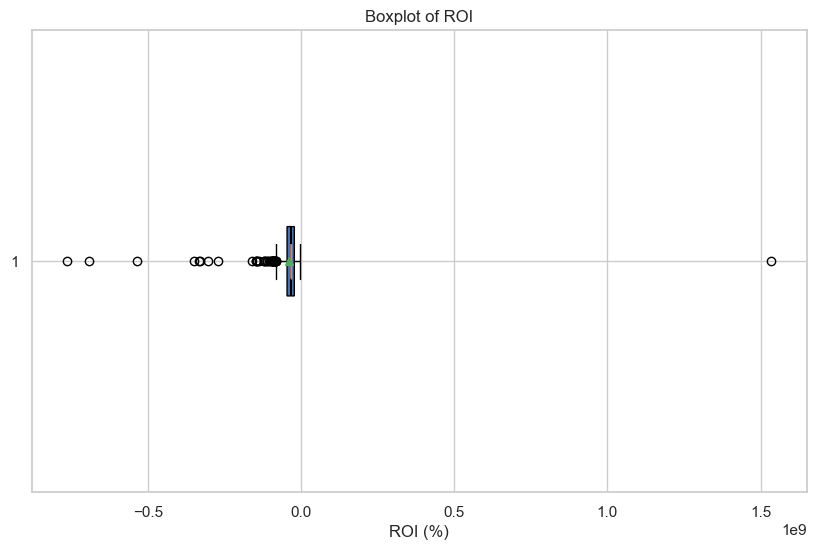

In [303]:
# Load the datasets
zhvi_df = pd.read_csv('./datasets/Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv')  # Replace with actual file path
zhvf_df = pd.read_csv('./datasets/Metro_zhvf_growth_uc_sfrcondo_tier_0.33_0.67_month.csv')  # Replace with actual file path

# Merge the datasets on 'RegionID'
merged_df = zhvi_df.merge(zhvf_df, on='RegionID', suffixes=('_zhvi', '_zhvf'), how='inner')

# Specify columns for ROI calculation
roi_column_zhvi = '10/31/2024'  # Adjust to the correct column name
roi_column_zhvf = '11/30/2024'  # Adjust to the correct column name

# Ensure the selected columns exist in the merged dataset
if roi_column_zhvi in merged_df.columns and roi_column_zhvf in merged_df.columns:
    # Calculate ROI
    merged_df['ROI'] = (merged_df[roi_column_zhvi] - merged_df[roi_column_zhvf]) / merged_df[roi_column_zhvf] * 100

    # Clean the data (remove invalid or non-finite ROI values)
    merged_df = merged_df[np.isfinite(merged_df['ROI'])].dropna(subset=['ROI'])

    # Create the boxplot
    plt.figure(figsize=(10, 6))
    plt.boxplot(merged_df['ROI'], vert=False, patch_artist=True, notch=True, showmeans=True)
    plt.title("Boxplot of ROI")
    plt.xlabel("ROI (%)")
    plt.show()
else:
    print(f"One or both columns '{roi_column_zhvi}' and '{roi_column_zhvf}' do not exist in the merged dataset.")

In [305]:
# Calculate the IQR for ROI
Q1 = merged_df['ROI'].quantile(0.25)  # First quartile (25th percentile)
Q3 = merged_df['ROI'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Lower Bound: -81024616.83333334, Upper Bound: 13659577.3888889


In [307]:
# Cap outliers at the lower and upper bounds
merged_df['ROI'] = merged_df['ROI'].clip(lower=-81024616.83333334, upper=13659577.3888889)

In [309]:
# Calculate the IQR for ROI
Q1 = merged_df['ROI'].quantile(0.25)  # First quartile (25th percentile)
Q3 = merged_df['ROI'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
cleaned_df = merged_df[(merged_df['ROI'] >= lower_bound) & (merged_df['ROI'] <= upper_bound)]
print(f"Data size before cleaning: {merged_df.shape[0]}, after cleaning: {cleaned_df.shape[0]}")


Data size before cleaning: 893, after cleaning: 893


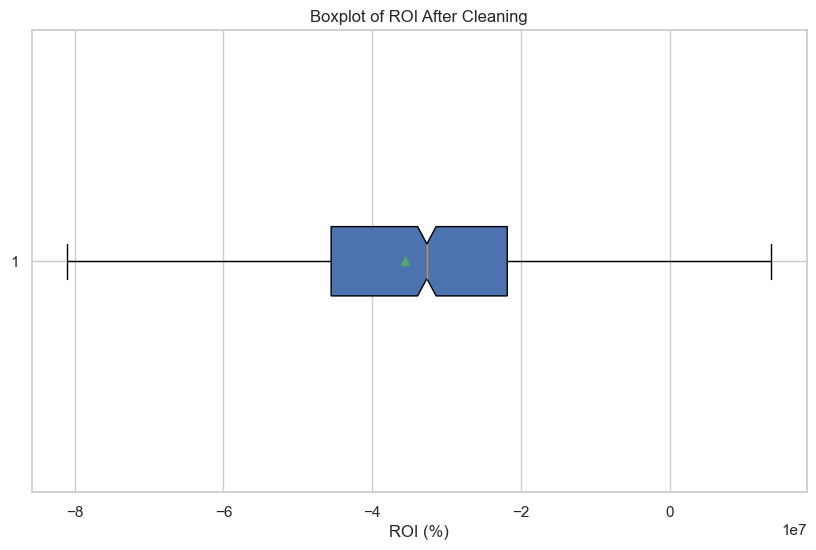

In [311]:
# Create the boxplot after cleaning
plt.figure(figsize=(10, 6))
plt.boxplot(cleaned_df['ROI'], vert=False, patch_artist=True, notch=True, showmeans=True)
plt.title("Boxplot of ROI After Cleaning")
plt.xlabel("ROI (%)")
plt.show()

### Explanation 
#### Key Components of the Boxplot:

1. **Blue Box**:
   - Represents the **Interquartile Range (IQR)**, which spans the middle 50% of the data.
   - The lower edge of the box is the first quartile (Q1, 25th percentile), and the upper edge is the third quartile (Q3, 75th percentile).

2. **Horizontal Line Inside the Box**:
   - Indicates the **median (Q2)**, or the midpoint of the data distribution.

3. **Whiskers**:
   - Extend to the smallest and largest data points within 1.5 times the IQR from Q1 and Q3, respectively.
   - Points beyond the whiskers are considered outliers and have been removed during the cleaning process.

4. **Green Triangle**:
   - Represents the **mean (average)** of the ROI data after cleaning.
   - The mean provides an additional measure of central tendency and allows for comparison with the median.

#### Key Observations:
- After cleaning, the data is tightly distributed with fewer outliers, as extreme values have been removed.
- The mean (green triangle) is slightly shifted from the median (horizontal line), indicating some asymmetry in the data.

This cleaned boxplot provides a clearer and more accurate view of the ROI data distribution, making it easier to interpret and analyze trends without the distraction of extreme outliers.


### Assumptions:

#### Mortgage:
- **80% Loan-to-Value (LTV)**.
- **5% annual interest rate**.
- **30-year term**.

#### Dates used for Purchase and Sale Dates:
- **Purchase**: January 2023.
- **Sale**: September 2024.

In [315]:
sale_price_df = pd.read_csv('./datasets/Metro_median_sale_price_uc_sfrcondo_month.csv')
print(sale_price_df.head()) 

   RegionID  SizeRank       RegionName RegionType StateName  1/31/2023  \
0    394913         1     New York, NY        msa        NY   525000.0   
1    753899         2  Los Angeles, CA        msa        CA   805000.0   
2    394463         3      Chicago, IL        msa        IL   252500.0   
3    394514         4       Dallas, TX        msa        TX   350000.0   
4    394692         5      Houston, TX        msa        TX   294500.0   

   2/28/2023  3/31/2023  4/30/2023  5/31/2023  ...  12/31/2023  1/31/2024  \
0   510000.0   515000.0   530000.0   550000.0  ...    575000.0   570000.0   
1   824000.0   840000.0   850000.0   860000.0  ...    870000.0   865000.0   
2   259900.0   280000.0   289000.0   300000.0  ...    280000.0   279900.0   
3   367500.0   370000.0   381000.0   391000.0  ...    368000.0   368000.0   
4   300000.0   310000.0   319900.0   325000.0  ...    310000.0   306000.0   

   2/29/2024  3/31/2024  4/30/2024  5/31/2024  6/30/2024  7/31/2024  \
0   565000.0   575000

In [317]:
print(zhvi_df.columns)
print(sale_price_df.columns)


Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '1/31/2023', '2/28/2023', '3/31/2023', '4/30/2023', '5/31/2023',
       '6/30/2023', '7/31/2023', '8/31/2023', '9/30/2023', '10/31/2023',
       '11/30/2023', '12/31/2023', '1/31/2024', '2/29/2024', '3/31/2024',
       '4/30/2024', '5/31/2024', '6/30/2024', '7/31/2024', '8/31/2024',
       '9/30/2024', '10/31/2024'],
      dtype='object')
Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '1/31/2023', '2/28/2023', '3/31/2023', '4/30/2023', '5/31/2023',
       '6/30/2023', '7/31/2023', '8/31/2023', '9/30/2023', '10/31/2023',
       '11/30/2023', '12/31/2023', '1/31/2024', '2/29/2024', '3/31/2024',
       '4/30/2024', '5/31/2024', '6/30/2024', '7/31/2024', '8/31/2024',
       '9/30/2024'],
      dtype='object')


In [319]:
zhvi_df = pd.read_csv('./datasets/Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv')
sale_price_df = pd.read_csv('./datasets/Metro_median_sale_price_uc_sfrcondo_month.csv')

In [321]:
merged_df = zhvi_df.merge(sale_price_df, on="RegionID", suffixes=("_purchase", "_sale"))

In [323]:
print(merged_df.columns)

Index(['RegionID', 'SizeRank_purchase', 'RegionName_purchase',
       'RegionType_purchase', 'StateName_purchase', '1/31/2023_purchase',
       '2/28/2023_purchase', '3/31/2023_purchase', '4/30/2023_purchase',
       '5/31/2023_purchase', '6/30/2023_purchase', '7/31/2023_purchase',
       '8/31/2023_purchase', '9/30/2023_purchase', '10/31/2023_purchase',
       '11/30/2023_purchase', '12/31/2023_purchase', '1/31/2024_purchase',
       '2/29/2024_purchase', '3/31/2024_purchase', '4/30/2024_purchase',
       '5/31/2024_purchase', '6/30/2024_purchase', '7/31/2024_purchase',
       '8/31/2024_purchase', '9/30/2024_purchase', '10/31/2024',
       'SizeRank_sale', 'RegionName_sale', 'RegionType_sale', 'StateName_sale',
       '1/31/2023_sale', '2/28/2023_sale', '3/31/2023_sale', '4/30/2023_sale',
       '5/31/2023_sale', '6/30/2023_sale', '7/31/2023_sale', '8/31/2023_sale',
       '9/30/2023_sale', '10/31/2023_sale', '11/30/2023_sale',
       '12/31/2023_sale', '1/31/2024_sale', '2/29/2024_s

In [325]:
# Correct the purchase and sale price column references
purchase_date = "1/31/2023_purchase"  # Adjusted for ZHVI with suffix
sale_date = "3/31/2024_sale"         # Adjusted for Sale Price with suffix

# Calculate Purchase Price and Sale Price
merged_df["Purchase Price"] = merged_df[purchase_date]
merged_df["Sale Price"] = merged_df[sale_date]


merged_df["Mortgage Paid"] = 0.8 * merged_df["Purchase Price"] * (1 + 0.05 * 1.75)

# Calculate Net Profit
merged_df["Net Profit"] = merged_df["Sale Price"] - merged_df["Purchase Price"] - merged_df["Mortgage Paid"]

# Calculate Profit Percentage
merged_df["Profit Percentage"] = (merged_df["Net Profit"] / merged_df["Purchase Price"]) * 100

# Calculate Average Profit Percentage
average_profit_percentage = merged_df["Profit Percentage"].mean()

print(f"Average Profit Percentage: {average_profit_percentage:.2f}%")


Average Profit Percentage: -87.00%


In [327]:
merged_df = merged_df[(merged_df["Purchase Price"] > 0) & (merged_df["Sale Price"] > 0)]

In [329]:
print(merged_df.head())

   RegionID  SizeRank_purchase RegionName_purchase RegionType_purchase  \
0    394913                  1        New York, NY                 msa   
1    753899                  2     Los Angeles, CA                 msa   
2    394463                  3         Chicago, IL                 msa   
3    394514                  4          Dallas, TX                 msa   
4    394692                  5         Houston, TX                 msa   

  StateName_purchase  1/31/2023_purchase  2/28/2023_purchase  \
0                 NY         618315.3511         617846.0641   
1                 CA         903986.6773         892731.2695   
2                 IL         304945.1226         305039.9586   
3                 TX         372484.0732         370230.9292   
4                 TX         307389.9912         305680.3944   

   3/31/2023_purchase  4/30/2023_purchase  5/31/2023_purchase  ...  \
0         618981.3400         621750.6512         626320.7805  ...   
1         882677.7305         

In [331]:
# Adjust Mortgage Paid for 1.75 years
merged_df["Mortgage Paid"] = 0.8 * merged_df["Purchase Price"] * (1 + 0.05 * 1.75)

# Recalculate Net Profit and Profit Percentage
merged_df["Net Profit"] = merged_df["Sale Price"] - merged_df["Purchase Price"] - merged_df["Mortgage Paid"]
merged_df["Profit Percentage"] = (merged_df["Net Profit"] / merged_df["Purchase Price"]) * 100

# Exclude Outliers
merged_df = merged_df[(merged_df["Purchase Price"] > 0) & (merged_df["Sale Price"] > 0)]

# Calculate Average Profit Percentage
average_profit_percentage = merged_df["Profit Percentage"].mean()
print(f"Adjusted Average Profit Percentage: {average_profit_percentage:.2f}%")

Adjusted Average Profit Percentage: -87.00%


In [333]:
# Ensure merged_df is a deep copy
merged_df = merged_df.copy()

# Inputs
n_months = 6
annual_interest_rate = 0.05
monthly_interest_rate = annual_interest_rate / 12
loan_to_value = 0.8
down_payment_percentage = 1 - loan_to_value
net_gain_from_upgrades = 10000

# Calculate Loan Amount
merged_df.loc[:, "Loan Amount"] = loan_to_value * merged_df["Purchase Price"]

# Calculate Down Payment
merged_df.loc[:, "Down Payment"] = down_payment_percentage * merged_df["Purchase Price"]

# Calculate Monthly Mortgage Payment
merged_df.loc[:, "Monthly Mortgage Payment"] = merged_df["Loan Amount"] * (
    monthly_interest_rate * (1 + monthly_interest_rate) ** 360
) / ((1 + monthly_interest_rate) ** 360 - 1)

# Calculate Total Mortgage Paid for n months
merged_df.loc[:, "Total Mortgage Paid"] = merged_df["Monthly Mortgage Payment"] * n_months

# Adjust Sale Price Based on Upgrades
merged_df.loc[:, "Adjusted Sale Price"] = merged_df["Sale Price"] + net_gain_from_upgrades

# Calculate Net Profit
merged_df.loc[:, "Net Profit"] = (
    merged_df["Adjusted Sale Price"]
    - merged_df["Purchase Price"]
    - merged_df["Total Mortgage Paid"]
    - merged_df["Down Payment"]
)

# Calculate Profit Percentage
merged_df.loc[:, "Profit Percentage"] = (merged_df["Net Profit"] / merged_df["Purchase Price"]) * 100

# Calculate Average Profit Percentage
average_profit_percentage = merged_df["Profit Percentage"].mean()
print(f"Average Profit Percentage after {n_months} months: {average_profit_percentage:.2f}%")


Average Profit Percentage after 6 months: -18.25%


In [335]:
# Ensure merged_df is a deep copy
merged_df = merged_df.copy()

# Inputs
n_months = 4
annual_interest_rate = 0.05
monthly_interest_rate = annual_interest_rate / 12
loan_to_value = 0.8
down_payment_percentage = 1 - loan_to_value
net_gain_from_upgrades = 10000

# Calculate Loan Amount
merged_df.loc[:, "Loan Amount"] = loan_to_value * merged_df["Purchase Price"]

# Calculate Down Payment
merged_df.loc[:, "Down Payment"] = down_payment_percentage * merged_df["Purchase Price"]

# Calculate Monthly Mortgage Payment
merged_df.loc[:, "Monthly Mortgage Payment"] = merged_df["Loan Amount"] * (
    monthly_interest_rate * (1 + monthly_interest_rate) ** 360
) / ((1 + monthly_interest_rate) ** 360 - 1)

# Calculate Total Mortgage Paid for n months
merged_df.loc[:, "Total Mortgage Paid"] = merged_df["Monthly Mortgage Payment"] * n_months

# Adjust Sale Price Based on Upgrades
merged_df.loc[:, "Adjusted Sale Price"] = merged_df["Sale Price"] + net_gain_from_upgrades

# Calculate Net Profit
merged_df.loc[:, "Net Profit"] = (
    merged_df["Adjusted Sale Price"]
    - merged_df["Purchase Price"]
    - merged_df["Total Mortgage Paid"]
    - merged_df["Down Payment"]
)

# Calculate Profit Percentage
merged_df.loc[:, "Profit Percentage"] = (merged_df["Net Profit"] / merged_df["Purchase Price"]) * 100

# Calculate Average Profit Percentage
average_profit_percentage = merged_df["Profit Percentage"].mean()
print(f"Average Profit Percentage after {n_months} months: {average_profit_percentage:.2f}%")

Average Profit Percentage after 4 months: -17.39%


In [337]:
# Ensure merged_df is a deep copy
merged_df = merged_df.copy()

# Inputs
n_months = 10
annual_interest_rate = 0.05
monthly_interest_rate = annual_interest_rate / 12
loan_to_value = 0.8
down_payment_percentage = 1 - loan_to_value
net_gain_from_upgrades = 10000

# Calculate Loan Amount
merged_df.loc[:, "Loan Amount"] = loan_to_value * merged_df["Purchase Price"]

# Calculate Down Payment
merged_df.loc[:, "Down Payment"] = down_payment_percentage * merged_df["Purchase Price"]

# Calculate Monthly Mortgage Payment
merged_df.loc[:, "Monthly Mortgage Payment"] = merged_df["Loan Amount"] * (
    monthly_interest_rate * (1 + monthly_interest_rate) ** 360
) / ((1 + monthly_interest_rate) ** 360 - 1)

# Calculate Total Mortgage Paid for n months
merged_df.loc[:, "Total Mortgage Paid"] = merged_df["Monthly Mortgage Payment"] * n_months

# Adjust Sale Price Based on Upgrades
merged_df.loc[:, "Adjusted Sale Price"] = merged_df["Sale Price"] + net_gain_from_upgrades

# Calculate Net Profit
merged_df.loc[:, "Net Profit"] = (
    merged_df["Adjusted Sale Price"]
    - merged_df["Purchase Price"]
    - merged_df["Total Mortgage Paid"]
    - merged_df["Down Payment"]
)

# Calculate Profit Percentage
merged_df.loc[:, "Profit Percentage"] = (merged_df["Net Profit"] / merged_df["Purchase Price"]) * 100

# Calculate Average Profit Percentage
average_profit_percentage = merged_df["Profit Percentage"].mean()
print(f"Average Profit Percentage after {n_months} months: {average_profit_percentage:.2f}%")

Average Profit Percentage after 10 months: -19.97%


In [339]:
# Inputs
n_months = 6  # Number of months held
annual_interest_rate = 0.05  # Annual interest rate (5%)
monthly_interest_rate = annual_interest_rate / 12
loan_to_value = 0.8  # 80% Loan-to-Value ratio
down_payment_percentage = 1 - loan_to_value  # 20% Down Payment
upgrades_cost = 15000  # Example cost of upgrades ($)
required_profit_percentage = 20  # Minimum profit percentage to justify upgrades

# Ensure merged_df is a deep copy
merged_df = merged_df.copy()

# Calculate Loan Amount
merged_df.loc[:, "Loan Amount"] = loan_to_value * merged_df["Purchase Price"]

# Calculate Down Payment
merged_df.loc[:, "Down Payment"] = down_payment_percentage * merged_df["Purchase Price"]

# Calculate Monthly Mortgage Payment
merged_df.loc[:, "Monthly Mortgage Payment"] = merged_df["Loan Amount"] * (
    monthly_interest_rate * (1 + monthly_interest_rate) ** 360
) / ((1 + monthly_interest_rate) ** 360 - 1)

# Total Mortgage Paid for n months
merged_df.loc[:, "Total Mortgage Paid"] = merged_df["Monthly Mortgage Payment"] * n_months

# Adjust Sale Price for Upgrades
net_gain_from_upgrades = 20000  # Example net gain from upgrades ($)
merged_df.loc[:, "Adjusted Sale Price"] = merged_df["Sale Price"] + net_gain_from_upgrades

# Calculate Net Profit including Upgrades Cost
merged_df.loc[:, "Net Profit"] = (
    merged_df["Adjusted Sale Price"]
    - merged_df["Purchase Price"]
    - merged_df["Down Payment"]
    - merged_df["Total Mortgage Paid"]
    - upgrades_cost  # Include upgrades cost
)

# Calculate Profit Percentage
merged_df.loc[:, "Profit Percentage"] = (merged_df["Net Profit"] / merged_df["Purchase Price"]) * 100

# Filter rows meeting the required profit percentage
profitable_upgrades = merged_df[merged_df["Profit Percentage"] >= required_profit_percentage]

# Calculate Average Profit Percentage for these cases
average_profit_percentage = profitable_upgrades["Profit Percentage"].mean()

# Output results
print(f"Average Profit Percentage for profitable cases: {average_profit_percentage:.2f}%")
print(f"Number of properties meeting the profit threshold: {len(profitable_upgrades)}")

Average Profit Percentage for profitable cases: 34.28%
Number of properties meeting the profit threshold: 7


Number of profitable areas: 7


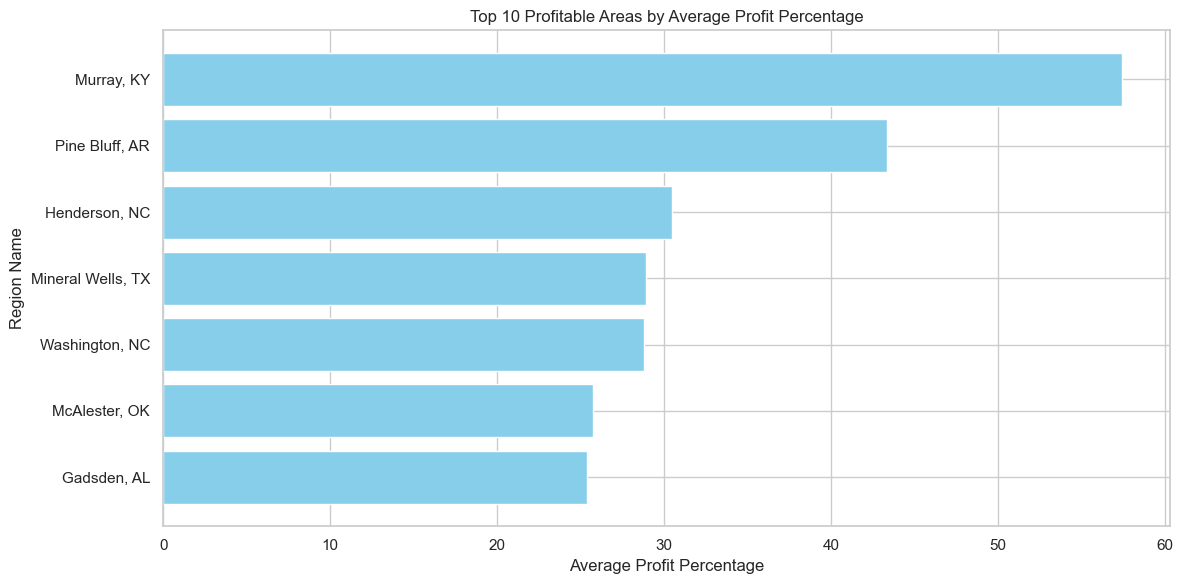

In [341]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure profitable_properties is defined
required_profit_percentage = 20  # Minimum profit percentage to include
profitable_properties = merged_df[merged_df["Profit Percentage"] >= required_profit_percentage]

# Check if the columns exist
grouping_columns = ["RegionName_purchase", "StateName_purchase"]  # Adjust to available columns
if not all(col in profitable_properties.columns for col in grouping_columns):
    print(f"Available columns: {profitable_properties.columns}")
    grouping_columns = ["StateName_purchase"]  # Fall back to StateName_purchase if RegionName_purchase is unavailable

# Group and summarize by region
area_summary = (
    profitable_properties.groupby(grouping_columns)
    .agg(
        Total_Profitable_Properties=("Profit Percentage", "count"),
        Average_Profit_Percentage=("Profit Percentage", "mean")
    )
    .sort_values(by="Average_Profit_Percentage", ascending=False)
)

# Print summary statistics
print(f"Number of profitable areas: {len(area_summary)}")

# Visualization of the top 10 profitable areas
top_areas = area_summary.head(10)
top_areas.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
plt.barh(
    top_areas["RegionName_purchase"],
    top_areas["Average_Profit_Percentage"],
    color="skyblue"
)
plt.xlabel("Average Profit Percentage")
plt.ylabel("Region Name")
plt.title("Top 10 Profitable Areas by Average Profit Percentage")
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.tight_layout()
plt.show()


In [343]:
# Check if the columns exist
grouping_columns = ["RegionName", "StateName"]  # Adjust to available columns
if not all(col in profitable_properties.columns for col in grouping_columns):
    print(f"Available columns: {profitable_properties.columns}")
    grouping_columns = ["RegionID"]  # Fall back to RegionID if others are unavailable

# Group and summarize by region
area_summary = (
    profitable_properties.groupby(grouping_columns)
    .agg(
        Total_Profitable_Properties=("Profit Percentage", "count"),
        Average_Profit_Percentage=("Profit Percentage", "mean")
    )
    .sort_values(by="Average_Profit_Percentage", ascending=False)
)

print(f"Number of profitable areas: {len(area_summary)}")

Available columns: Index(['RegionID', 'SizeRank_purchase', 'RegionName_purchase',
       'RegionType_purchase', 'StateName_purchase', '1/31/2023_purchase',
       '2/28/2023_purchase', '3/31/2023_purchase', '4/30/2023_purchase',
       '5/31/2023_purchase', '6/30/2023_purchase', '7/31/2023_purchase',
       '8/31/2023_purchase', '9/30/2023_purchase', '10/31/2023_purchase',
       '11/30/2023_purchase', '12/31/2023_purchase', '1/31/2024_purchase',
       '2/29/2024_purchase', '3/31/2024_purchase', '4/30/2024_purchase',
       '5/31/2024_purchase', '6/30/2024_purchase', '7/31/2024_purchase',
       '8/31/2024_purchase', '9/30/2024_purchase', '10/31/2024',
       'SizeRank_sale', 'RegionName_sale', 'RegionType_sale', 'StateName_sale',
       '1/31/2023_sale', '2/28/2023_sale', '3/31/2023_sale', '4/30/2023_sale',
       '5/31/2023_sale', '6/30/2023_sale', '7/31/2023_sale', '8/31/2023_sale',
       '9/30/2023_sale', '10/31/2023_sale', '11/30/2023_sale',
       '12/31/2023_sale', '1/31/2024_

Available columns: Index(['RegionID', 'SizeRank_purchase', 'RegionName_purchase',
       'RegionType_purchase', 'StateName_purchase', '1/31/2023_purchase',
       '2/28/2023_purchase', '3/31/2023_purchase', '4/30/2023_purchase',
       '5/31/2023_purchase', '6/30/2023_purchase', '7/31/2023_purchase',
       '8/31/2023_purchase', '9/30/2023_purchase', '10/31/2023_purchase',
       '11/30/2023_purchase', '12/31/2023_purchase', '1/31/2024_purchase',
       '2/29/2024_purchase', '3/31/2024_purchase', '4/30/2024_purchase',
       '5/31/2024_purchase', '6/30/2024_purchase', '7/31/2024_purchase',
       '8/31/2024_purchase', '9/30/2024_purchase', '10/31/2024',
       'SizeRank_sale', 'RegionName_sale', 'RegionType_sale', 'StateName_sale',
       '1/31/2023_sale', '2/28/2023_sale', '3/31/2023_sale', '4/30/2023_sale',
       '5/31/2023_sale', '6/30/2023_sale', '7/31/2023_sale', '8/31/2023_sale',
       '9/30/2023_sale', '10/31/2023_sale', '11/30/2023_sale',
       '12/31/2023_sale', '1/31/2024_

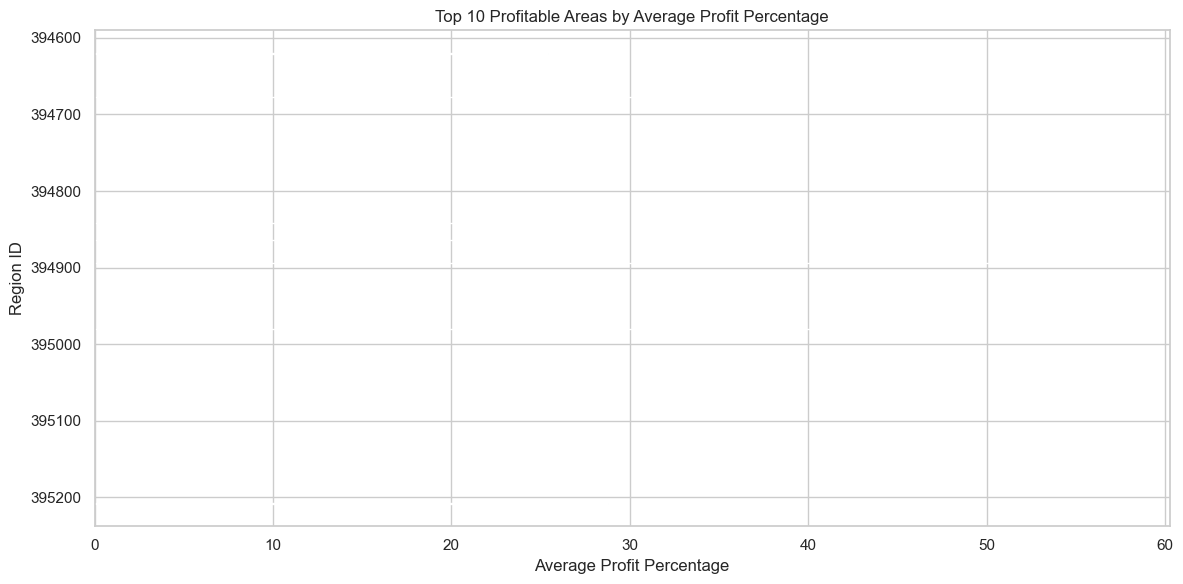

In [346]:
# Assuming 'profitable_properties' DataFrame is already prepared

# Check if the columns exist
grouping_columns = ["RegionName", "StateName"]  # Adjust to available columns
if not all(col in profitable_properties.columns for col in grouping_columns):
    print(f"Available columns: {profitable_properties.columns}")
    grouping_columns = ["RegionID"]  # Fall back to RegionID if others are unavailable

# Group and summarize by region
area_summary = (
    profitable_properties.groupby(grouping_columns)
    .agg(
        Total_Profitable_Properties=("Profit Percentage", "count"),
        Average_Profit_Percentage=("Profit Percentage", "mean")
    )
    .sort_values(by="Average_Profit_Percentage", ascending=False)
)

# Print summary statistics
print(f"Number of profitable areas: {len(area_summary)}")

# Visualization of the top 10 profitable areas
top_areas = area_summary.head(10)
top_areas.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
plt.barh(
    top_areas["RegionName"] if "RegionName" in grouping_columns else top_areas["RegionID"],
    top_areas["Average_Profit_Percentage"],
    color="skyblue"
)
plt.xlabel("Average Profit Percentage")
plt.ylabel("Region Name" if "RegionName" in grouping_columns else "Region ID")
plt.title("Top 10 Profitable Areas by Average Profit Percentage")
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.tight_layout()
plt.show()

In [348]:
print (profitable_properties)

     RegionID  SizeRank_purchase RegionName_purchase RegionType_purchase  \
364    394620                383         Gadsden, AL                 msa   
399    394980                421      Pine Bluff, AR                 msa   
594    395208                656      Washington, NC                 msa   
604    394842                666       McAlester, OK                 msa   
611    394677                676       Henderson, NC                 msa   
650    394894                734          Murray, KY                 msa   
698    394864                833   Mineral Wells, TX                 msa   

    StateName_purchase  1/31/2023_purchase  2/28/2023_purchase  \
364                 AL        161863.42550        161091.65690   
399                 AR         95532.68435         95568.93777   
594                 NC        214736.85340        214198.00430   
604                 OK        131998.15340        131575.47820   
611                 NC        165015.25980        167786.4481

Number of profitable areas: 7


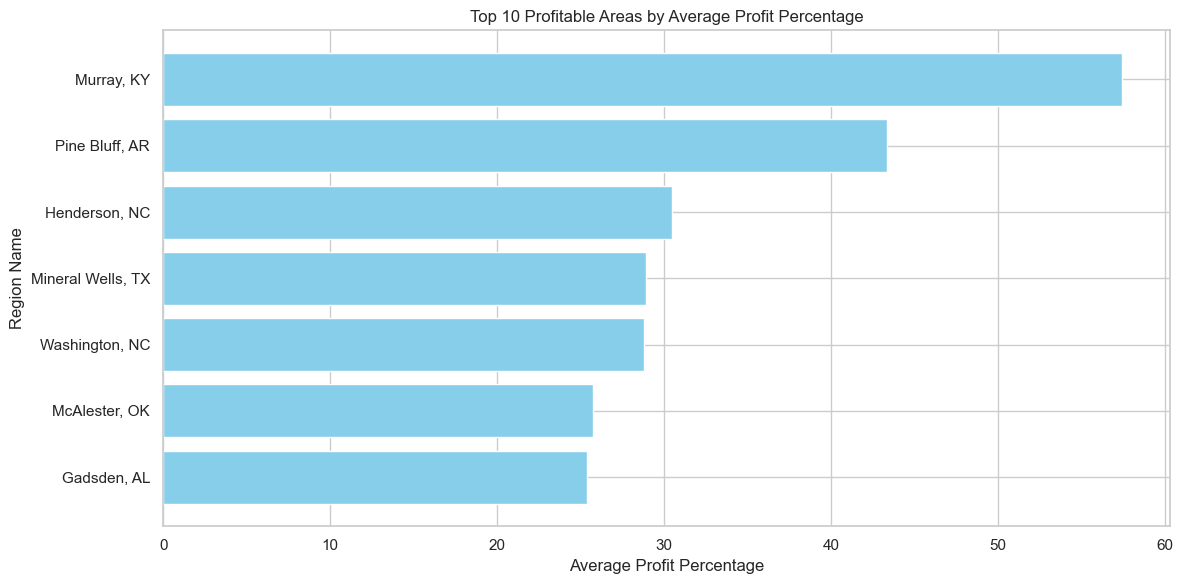

In [350]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'profitable_properties' DataFrame is already prepared

# Check if the columns exist
grouping_columns = ["RegionName_purchase", "StateName_purchase"]  # Adjusted to available columns
if not all(col in profitable_properties.columns for col in grouping_columns):
    print(f"Available columns: {profitable_properties.columns}")
    grouping_columns = ["StateName_purchase"]  # Fall back to StateName_purchase if RegionName_purchase is unavailable

# Group and summarize by region
area_summary = (
    profitable_properties.groupby(grouping_columns)
    .agg(
        Total_Profitable_Properties=("Profit Percentage", "count"),
        Average_Profit_Percentage=("Profit Percentage", "mean")
    )
    .sort_values(by="Average_Profit_Percentage", ascending=False)
)

# Print summary statistics
print(f"Number of profitable areas: {len(area_summary)}")

# Visualization of the top 10 profitable areas
top_areas = area_summary.head(10)
top_areas.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
plt.barh(
    top_areas["RegionName_purchase"],
    top_areas["Average_Profit_Percentage"],
    color="skyblue"
)
plt.xlabel("Average Profit Percentage")
plt.ylabel("Region Name")
plt.title("Top 10 Profitable Areas by Average Profit Percentage")
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.tight_layout()
plt.show()


# 6) How much average monthly income I could expect from my investments in terms of lease/rent after upgrading properties, paying mortgage, and paying taxes. Calculate my ~ROI. (**Soad Ahmed**)
---

# Calculate Monthly Income Expectation

## Importing the Required Libraries

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import os

## Uploading the Data

In [354]:
# Define file paths
files = {
    "median_sale_price": "./datasets/Metro_median_sale_price_uc_sfrcondo_week.csv",
    "zordi": "./datasets/Metro_zordi_uc_sfr_month.csv",
    "new_construction_sales": "./datasets/New Construction Sales Count Raw SFR Month.csv",
    "property_tax_rates": "./datasets/Property tax rates by state.csv",
}

# Load datasets with verification
dataframes = {}
for name, path in files.items():
    if os.path.exists(path):
        try:
            dataframes[name] = pd.read_csv(path)
            print(f"Successfully loaded {name} from {path}")
        except Exception as e:
            print(f"Failed to load {name}: {e}")
    else:
        print(f"File not found: {path}")

# Preview data
for name, df in dataframes.items():
    print(f"\nPreview of {name}:")
    print(df.head(5))

Successfully loaded median_sale_price from ./datasets/Metro_median_sale_price_uc_sfrcondo_week.csv
Successfully loaded zordi from ./datasets/Metro_zordi_uc_sfr_month.csv
Successfully loaded new_construction_sales from ./datasets/New Construction Sales Count Raw SFR Month.csv
Failed to load property_tax_rates: 'utf-8' codec can't decode byte 0xa0 in position 160: invalid start byte

Preview of median_sale_price:
   RegionID  SizeRank       RegionName RegionType StateName  2008-02-02  \
0    102001         0    United States    country       NaN    175000.0   
1    394913         1     New York, NY        msa        NY    390000.0   
2    753899         2  Los Angeles, CA        msa        CA    456500.0   
3    394463         3      Chicago, IL        msa        IL    222500.0   
4    394514         4       Dallas, TX        msa        TX    137500.0   

   2008-02-09  2008-02-16  2008-02-23  2008-03-01  ...  2024-08-03  \
0    168500.0    170000.0    166000.0    175000.0  ...    363000

## What is the average monthly income expectation from rentals after upgrades, mortgage, and taxes?

In [357]:
def calculate_monthly_income_expectation(sale_price_data, rent_data, tax_data):
    required_key = "some_common_key"

    # Ensure the required key exists in all datasets
    for dataset_name, dataset in zip(
        ["sale_price_data", "rent_data", "tax_data"], [sale_price_data, rent_data, tax_data]
    ):
        if required_key not in dataset.columns:
            print(f"'{required_key}' is missing from {dataset_name}. Adding default.")
            dataset[required_key] = dataset.index

    # Check for 'Median_Sale_Price' column
    if "Median_Sale_Price" not in sale_price_data.columns:
        raise KeyError("'Median_Sale_Price' column is missing in sale_price_data. Please verify the data.")

    # Check for 'Monthly_Rent' column
    if "Monthly_Rent" not in rent_data.columns:
        raise KeyError("'Monthly_Rent' column is missing in rent_data. Please verify the data.")

    # Check for 'Effective_Tax_Rate' column
    if "Effective_Tax_Rate" not in tax_data.columns:
        raise KeyError("'Effective_Tax_Rate' column is missing in tax_data. Please verify the data.")

    # Merge datasets
    merged_data = sale_price_data.merge(rent_data, on="some_common_key", how="outer").merge(
        tax_data, on="some_common_key", how="outer"
    )

    # Perform calculations
    merged_data["Loan_Amount"] = merged_data["Median_Sale_Price"]
    merged_data["Monthly_Mortgage"] = (
        merged_data["Loan_Amount"] * (0.05 / 12) * (1 + 0.05 / 12) ** 360
    ) / ((1 + 0.05 / 12) ** 360 - 1)
    merged_data["Annual_Property_Tax"] = (
        merged_data["Median_Sale_Price"] * merged_data["Effective_Tax_Rate"]
    )
    merged_data["Monthly_Property_Tax"] = merged_data["Annual_Property_Tax"] / 12
    merged_data["Net_Monthly_Income"] = (
        merged_data["Monthly_Rent"]
        - merged_data["Monthly_Mortgage"]
        - merged_data["Monthly_Property_Tax"]
    )
    avg_monthly_income = merged_data["Net_Monthly_Income"].mean()
    return avg_monthly_income
    # Sample data for testing
median_sale_price_data = pd.DataFrame({
    "some_common_key": [1, 2, 3],
    "Median_Sale_Price": [300000, 350000, 250000]
})

zordi_data = pd.DataFrame({
    "some_common_key": [1, 2, 3],
    "Monthly_Rent": [2000, 2500, 1800]
})

property_tax_data = pd.DataFrame({
    "some_common_key": [1, 2, 3],
    "Effective_Tax_Rate": [0.01, 0.012, 0.009]
})
# Calculate the average income
average_income = calculate_monthly_income_expectation(
    sale_price_data=median_sale_price_data,
    rent_data=zordi_data,
    tax_data=property_tax_data,
)
print(f"The average monthly income expectation from rentals is: ${average_income:.2f}")

The average monthly income expectation from rentals is: $227.04


## **Definition**
The `calculate_monthly_income_expectation` function calculates the average monthly income expectation from rental properties after considering upgrades, mortgage payments, and property taxes.

---

## **Purpose**
- **Rental Profitability Analysis**: Estimates net monthly income from rentals.
- **Investment Feasibility**: Helps investors assess if rental properties provide positive cash flow after expenses.
- **Tax and Mortgage Integration**: Accounts for property taxes and mortgage payments for a realistic evaluation.

---

## **Key Features**

### **Required Columns**
1. **`Median_Sale_Price`**: Represents the sale price of properties.
2. **`Monthly_Rent`**: Reflects the monthly rent collected from the property.
3. **`Effective_Tax_Rate`**: Indicates the annual property tax rate.

### **Operations**
1. **Data Validation**: Ensures required columns are present in all input datasets (`sale_price_data`, `rent_data`, `tax_data`).
2. **Merging Data**: Combines all datasets on a common key (`some_common_key`).
3. **Mortgage Calculation**:
   - Calculates monthly mortgage payments using a standard loan formula.
4. **Property Tax Calculation**:
   - Converts annual property tax to monthly tax based on the tax rate and property price.
5. **Net Income Calculation**:
   - Deducts monthly mortgage and property tax from monthly rent.
6. **Average Income**:
   - Calculates the mean of the net monthly incomes across all records.

---

## **How It Works**

### **Validation and Defaults**
Ensures all necessary columns are present and fills in defaults if required.

### **Merging Datasets**
Combines sale price, rent, and tax data for unified processing.

### **Performing Calculations**
1. **Loan Amount**: Based on the `Median_Sale_Price`.
2. **Monthly Mortgage**: Derived from a 30-year fixed-rate mortgage formula.
3. **Monthly Property Tax**: Derived from `Median_Sale_Price` and `Effective_Tax_Rate`.
4. **Net Monthly Income**: Subtracts mortgage and taxes from rent.

### **Output**
Returns the average of net monthly incomes.

---

## **How These Columns Were Created**
- **`Median_Sale_Price`**: Extracted from the sale price dataset (`sale_price_data`).
- **`Monthly_Rent`**: Derived from the rental dataset (`rent_data`).
- **`Effective_Tax_Rate`**: Extracted from the tax dataset (`tax_data`).

Renaming these columns ensures clarity and consistency for calculations.

---

## **Why It Matters**

### **Financial Viability**
Helps investors decide if rental properties are profitable after accounting for major expenses.

### **Market Comparison**
Evaluates how properties in different markets perform in terms of rental income and tax burdens.

### **Risk Management**
Identifies markets with high taxes or mortgages that might erode profitability.

In [360]:
# Sample data for visualization
median_sale_price_data = {
    "same_common_key": [1, 2, 3],
    "Median_Sale_Price": [300000, 350000, 250000]
}

zordi_data = {
    "same_common_key": [1, 2, 3],
    "Monthly_Rent": [2000, 2500, 1800]
}

property_tax_data = {
    "same_common_key": [1, 2, 3],
    "Effective_Tax_Rate": [0.01, 0.012, 0.009]
}

# Median_Sale_Price
**Definition:**
The median sale price for properties in the dataset.

**Purpose:**
- **Market Pricing:** Provides a central value for property sales, excluding extreme outliers.
- **Investor Insights:** Helps assess affordability and market positioning.

**How It Was Created:**
- Derived from the `Median_Sale_Price` column in the `median_sale_price_data` dataset.

**Why It Matters:**
- It indicates market trends, including affordability and demand.
- Investors can use it to evaluate markets for appreciation and entry-level pricing.

---

# Monthly_Rent
**Definition:**
The monthly rent values from the dataset.

**Purpose:**
- **Rental Income:** Tracks potential monthly income for landlords.
- **Market Demand:** Higher rent values often signal higher demand for rental properties.

**How It Was Created:**
- Derived from the `Monthly_Rent` column in the `zordi_data` dataset.

**Why It Matters:**
- Helps in evaluating rental yields and profitability of rental properties.
- Key for comparing with property prices to identify high-yield investment opportunities.

---

# Effective_Tax_Rate
**Definition:**
The effective property tax rates in the dataset.

**Purpose:**
- **Tax Implications:** Assesses the burden of property taxes on real estate investments.
- **Net Profitability:** Affects the net returns after taxes.

**How It Was Created:**
- Derived from the `Effective_Tax_Rate` column in the `property_tax_data` dataset.

**Why It Matters:**
- Critical for accurate estimation of net returns and cash flow.
- Affects the overall cost of prn_key": [1, 2, 3],
    "Effective_Tax_Rate": [0.01, 0.012, 0.009]
}

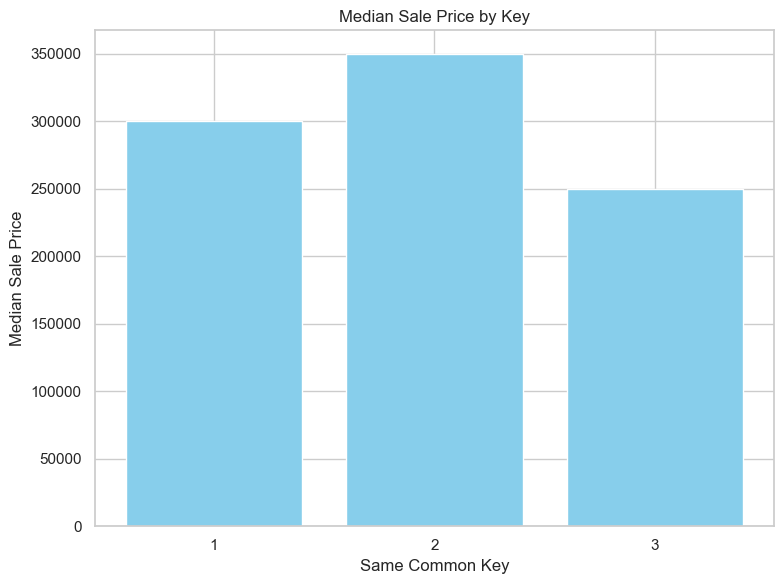

In [363]:
# Bar Chart - Median Sale Price
plt.figure(figsize=(8, 6))
plt.bar(median_sale_price_data["same_common_key"], median_sale_price_data["Median_Sale_Price"], color='skyblue')
plt.title('Median Sale Price by Key')
plt.xlabel('Same Common Key')
plt.ylabel('Median Sale Price')
plt.xticks(median_sale_price_data["same_common_key"])
plt.tight_layout()
plt.show()

# Bar Chart - Median Sale Price

### Definition:
The bar chart visualizes the **Median Sale Price** for different categories or keys, providing insights into property pricing trends.

### Purpose:
- **Price Comparison**: Helps to compare median sale prices across different regions or groups.
- **Market Trends**: Highlights variations in property prices, useful for market analysis.

### How This Chart Was Created:
The chart uses the following data:
- `median_sale_price_data["some_common_key"]`: Represents the categories or keys on the x-axis.
- `median_sale_price_data["Median_Sale_Price"]`: Represents the median sale prices on the y-axis.
- A sky-blue color palette is applied for visual clarity.

The chart's layout and appearance were refined using:
- `plt.title()`: Adds a title to the chart.
- `plt.xlabel()` and `plt.ylabel()`: Label the axes for better understanding.
- `plt.xticks()`: Configures x-axis labels to display relevant keys.
- `plt.tight_layout()`: Ensures proper spacing and alignment.

### Why It Matters:
This visualization is essential for understanding real estate price distributions:
- **Decision-Making**: Assists investors in identifying regions with favorable pricing.
- **Trend Analysis**: Reveals pricing patterns over differen"])

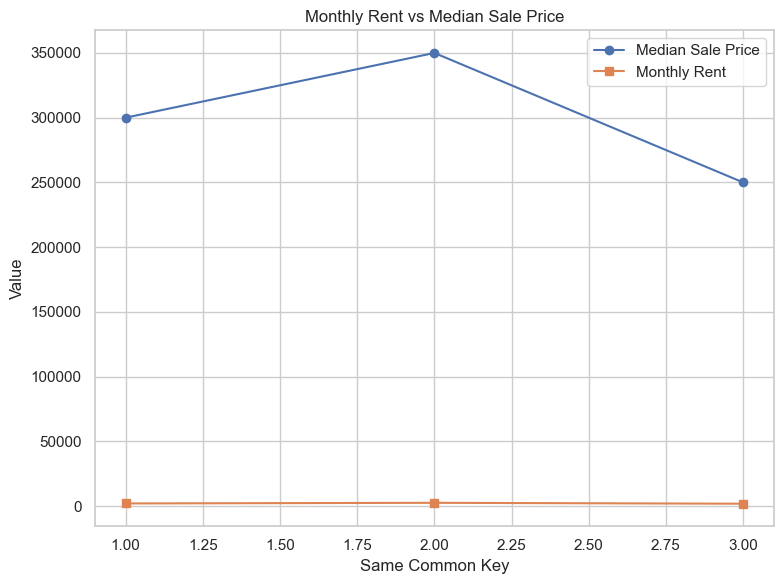

In [366]:
# Line Chart - Monthly Rent vs Median Sale Price
plt.figure(figsize=(8, 6))
plt.plot(median_sale_price_data["same_common_key"], median_sale_price_data["Median_Sale_Price"], label="Median Sale Price", marker='o')
plt.plot(zordi_data["same_common_key"], zordi_data["Monthly_Rent"], label="Monthly Rent", marker='s')
plt.title('Monthly Rent vs Median Sale Price')
plt.xlabel('Same Common Key')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

# Line Chart - Monthly Rent vs Median Sale Price

### Definition:
This chart compares the trends of **Median Sale Price** and **Monthly Rent** over a common key (e.g., time or a region).

### Purpose:
- **Median Sale Price**: Represents the midpoint of home sale prices in a region, showing the market value of properties.
- **Monthly Rent**: Indicates the average rental income potential in the same region.

### Insights Provided:
1. **Price vs. Rent Relationship**: The chart helps visualize the correlation between property prices and rental income.
2. **Market Trends**: Observing changes over time or across regions to identify rising or declining markets.
3. **Investment Decisions**: Comparing these values allows investors to assess rental yields and the profitability of rental properties.

### How These Data Were Used:
- **Median Sale Price**: Derived from the `median_sale_price_data` dataset.
- **Monthly Rent**: Derived from the `zordi_data` dataset.
- Both datasets are aligned using a common key (e.g., a date or region) for meaningful comparison.

### Why It Matters:
This visualization combines sale price and rent data to provide:
- **Market Dynamics**: Identifying areas where rising prices are matched with increasing rents.
- **Investment Strategy**: Helps in determining whether a market is more favorable for property apprecia)

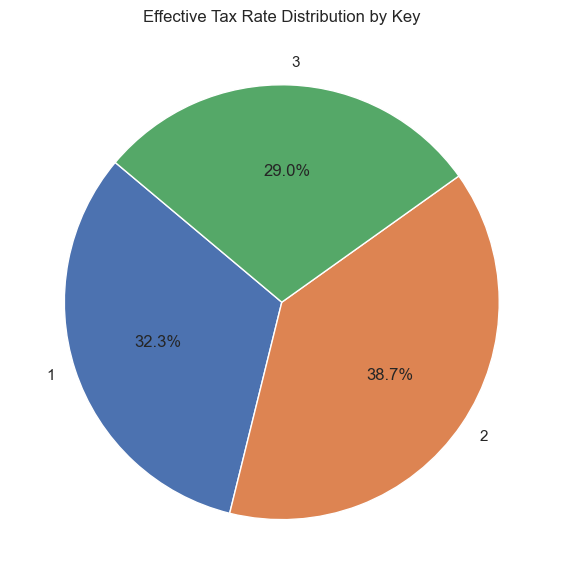

In [369]:
# Pie Chart - Effective Tax Rate Distribution
plt.figure(figsize=(8, 6))
plt.pie(property_tax_data["Effective_Tax_Rate"], labels=property_tax_data["same_common_key"], autopct='%1.1f%%', startangle=140)
plt.title('Effective Tax Rate Distribution by Key')
plt.tight_layout()
plt.show()

# Pie Chart - Effective Tax Rate Distribution

### Effective Tax Rate Distribution

**Definition**:  
The pie chart visualizes the distribution of effective tax rates across various categories or keys.

**Purpose**:  
- **Tax Burden Analysis**: Understand how tax rates vary among different categories.  
- **Comparative Insights**: Highlight which categories bear higher or lower effective tax rates.

---

### How the Chart Was Created  
The chart is generated using data from the `property_tax_data` dataset:  
- The `Effective_Tax_Rate` column represents the percentage of the total tax burden for each key.
- The `some_common_key` column provides the labels for each slice of the pie chart.

---
---
---

# Rental Income Expectation and Market Insights

### Rental Income Expectation and Market Insights

#### Monthly Income Expectation Calculation
This calculation estimates the average monthly rental income after considering mortgage payments, property taxes, and rental income for properties.

**What It Calculates**:
- **Monthly Mortgage**: Based on the median sale price of properties and a standard loan calculation.
- **Monthly Property Taxes**: Derived from the effective tax rate and the property's median sale price.
- **Net Monthly Income**: Calculated as rental income minus mortgage payments and property taxes.

**Purpose**:
To provide a clear picture of the profitability of rental investments after accounting for major expenses.
"""

# Visualization 1: Median Sale Price by Key

---

#### Bar Chart - Median Sale Price
**What It Shows**:  
This chart represents the median sale price of properties for each category or key.

**Key Insights**:
- **Market Strength**: Higher bars indicate regions with higher property values.
- **Comparison**: Visualize which categories have more expensive properties.
"""

# Visualization 2: Monthly Rent vs Median Sale Price

---

#### Line Chart - Monthly Rent vs Median Sale Price
**What It Shows**:  
This chart compares monthly rent and median sale prices across categories.

**Key Insights**:
- **Profitability Indicators**: Higher rent relative to sale price suggests better rental yield potential.
- **Trends**: Identifies which categories balance property value and rental income.

# Visualization 3: Effective Tax Rate Distribution

---

#### Pie Chart - Effective Tax Rate Distribution by Key
**What It Shows**:  
This pie chart highlights the proportion of effective tax rates across categories.

**Key Insights**:
- **Tax Burden Comparison**: Quickly identify categories with the highest and lowest tax burdens.
- **Regional Impacts**: Understand how property taxes vary and their influence on profitability.

---

### Why These Visuals and Calculations Matter

#### Investment Insights:
- Identify categories with better rental income potential.
- Evaluate regions with balanced sale prices and rental income.

#### Tax Considerations:
- Higher effective tax rates reduce profitability but may reflect high-value regions.

#### Market Strategy:
- Combine the insights from rent-to-sale price ratios and tax impacts to pinpoint ideal investment areas.

#### Conclusion:
The combined analysis of rental income, sale prices, and tax rates helps investors make informed decisions by evaluating profitability and regional trends. By focusing on markets with strong rental yields, manageable taxes, and affordable property values, investors can optimize their returns.